## Visualization

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

import seaborn as sns
sns.set_style("white")
fig_w = 2530
fig_h = 1900
my_dpi=200



Config plot styles

In [17]:
plt.style.use('ggplot')

from matplotlib import rcParams
# plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

plt.rc('font', family='BabelStone Han', size=13) # 选择你自己电脑上的字体

Load data

In [4]:
# 如果还没有数据，来群里索要数据文件就行

df = pd.read_csv('data/full-data.csv') 

Validate all the possible columns of data frame

In [5]:
list(df.columns.values)

['Unnamed: 0',
 'aid',
 'uid',
 'time',
 'duration',
 'state',
 'view',
 'danmaku',
 'coin',
 'favorite',
 'share',
 'reply',
 'like',
 'sectid',
 'sectname']

## Average Views and Coins for different Duration

First of all we plot out the histogram of duration for future references

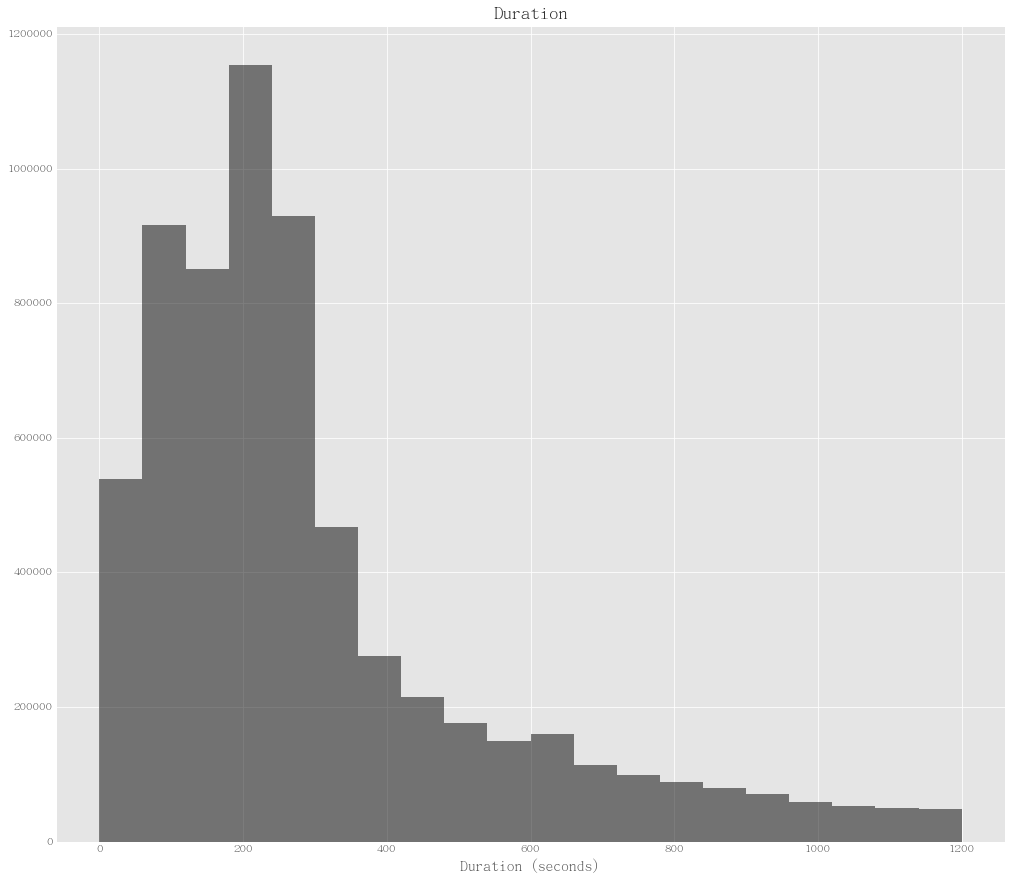

In [6]:
hist_fig, hist_ax = plt.subplots(nrows=1, ncols=1,figsize=(17, 15))

hist_ax.hist( df['duration'], color='k', alpha=0.5, bins=20, range=[0, 1200] )
hist_ax.set_title('Duration')
hist_ax.set_xlabel('Duration (seconds)');

Create a dataframe to store the average data

In [7]:
index_du = ['duration', 'view', 'coin', 'favorite', 'like', 'sectname','sectid']
df_du = pd.DataFrame(columns=index_du)

for i in np.linspace(60,1200,20):
    df_temp = df[df['duration'].between(i-60,i)].groupby('sectname')['view', 'coin','favorite','like','sectid'].mean().round(2)
    df_temp = df_temp.reset_index()
    df_temp['duration'] = int(i/60)
    df_temp['sectid'] = df_temp['sectid'].astype(int)
    df_du = pd.concat([df_du,df_temp])

### Total Average

Calculate the total mean values of each categories

In [8]:
df_du_tot = df_du.groupby('sectname')['view', 'coin','favorite','like','sectid','sectname','sectid'].mean().reset_index()

Print out the data frame

In [9]:
df_du_tot

,sectname,view,coin,favorite,like
0,ASMR,7243.192500,33.331500,220.112500,10.328000
1,GMV,6969.783500,127.273500,260.985500,14.733500
2,Korea相关,12832.623000,23.556000,508.001000,4.510000
3,MAD-AMV,10577.197500,162.366500,424.842500,10.146500
4,MMD-3D,6540.008000,88.569500,432.972500,19.074500
5,MMD.3D,377584.700000,4889.900000,21217.000000,124.800000
6,Mugen,2624.583000,18.195000,22.944000,2.356000
7,OP-ED-OST,4196.035000,25.306000,171.007500,5.216000
8,VOCALOID-UTAU,5782.386000,77.573000,281.705500,10.334500
9,flash游戏,15224.537500,0.302500,88.397500,0.132500


Predefine all the max values for plotting

In [10]:
max_views = df_du_tot.max()['view']
max_coins = df_du_tot.max()['coin']
max_favorite = df_du_tot.max()['favorite']
max_views,\
max_coins,\
max_favorite

(713233.0, 9432.0, 21217.0)

All the categories

In [11]:
pd.Categorical(df_du_tot['sectname'])

[ASMR, GMV, Korea相关, MAD-AMV, MMD-3D, ..., 音MAD, 音乐选集, 音游, 预告 资讯, 鬼畜调教]
Length: 81
Categories (81, object): [ASMR, GMV, Korea相关, MAD-AMV, ..., 音乐选集, 音游, 预告 资讯, 鬼畜调教]

Plotting out the total averages values

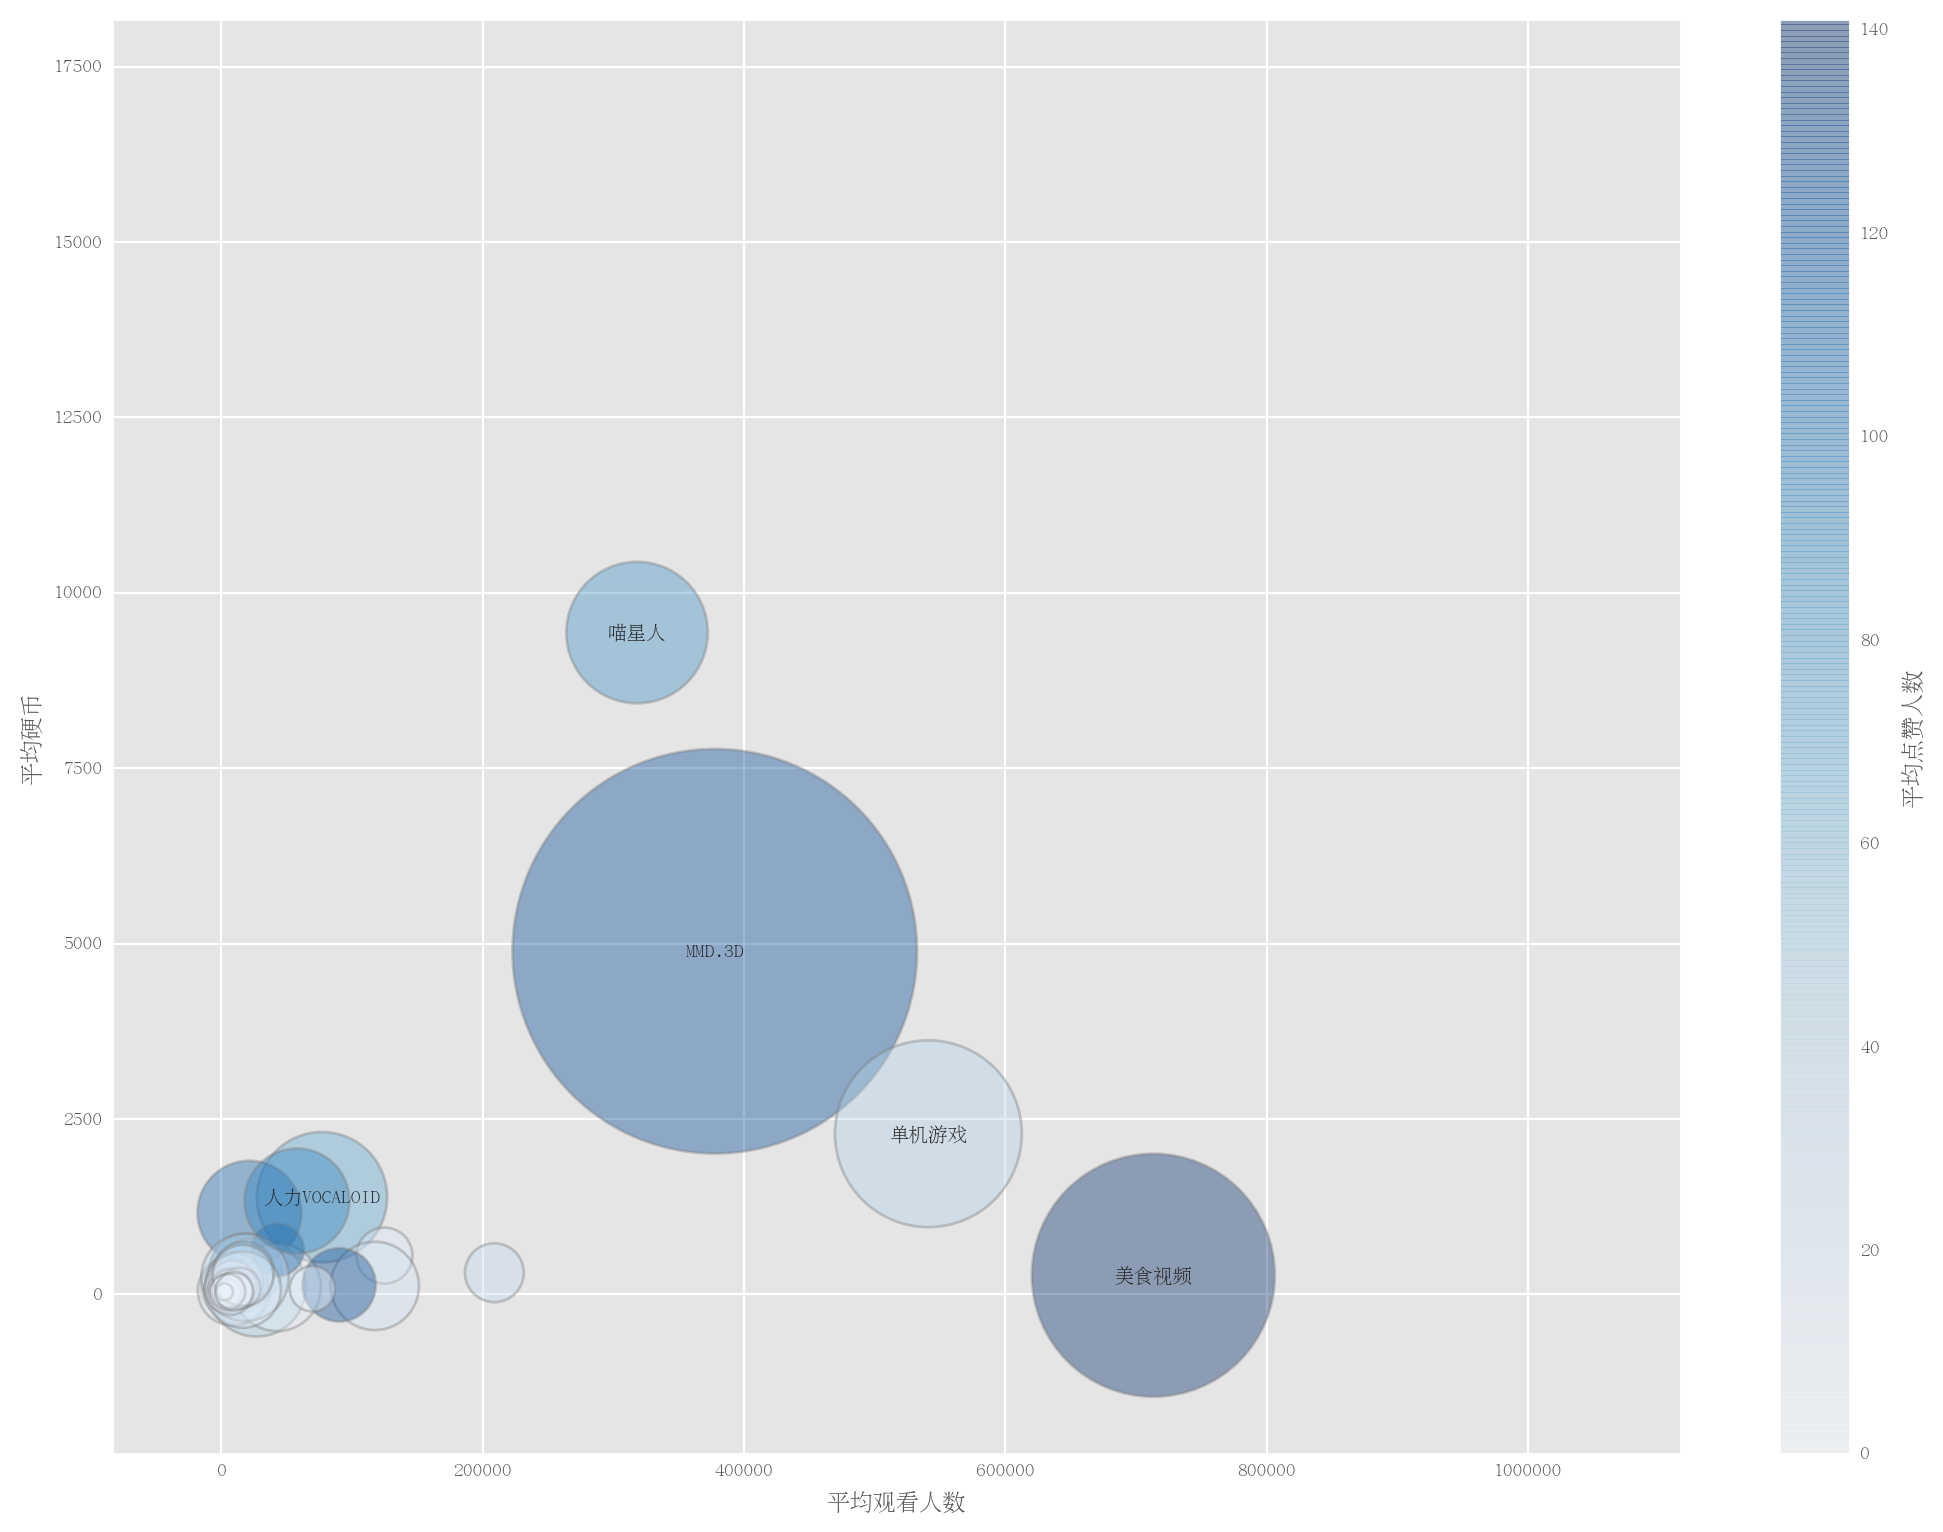

In [37]:
plt.rc('font', family='BabelStone Han', size=7)  # 选择你自己电脑上的字体

fig_tot, ax_tot = plt.subplots(1,1, figsize=(fig_w/my_dpi, fig_h/my_dpi), dpi=my_dpi)
plt_tot = ax_tot.scatter(df_du_tot['view'].values, df_du_tot['coin'].values, s=df_du_tot['favorite'].values, c=df_du_tot['like'].values, cmap="Blues", alpha=0.4, edgecolors="grey", linewidth=1)

for i, txt in enumerate( df_du_tot['sectname'].values ):
    if df_du_tot['favorite'].values[i] > 2000:
        ax_tot.annotate(txt, ( (df_du_tot['view'].values)[i], (df_du_tot['coin'].values)[i] ), ha='center', va='center')

ax_tot.set(xlim =[-0.09*max_views,max_views*1.2], ylim =[-0.15*max_coins,max_coins*1.2])
ax_tot.set(xlabel= '平均观看人数', ylabel='平均硬币')
plt.colorbar(plt_tot, label='平均点赞人数')
plt.show()

### 科技区：


In [45]:
# print(df_du['sectname'].to_string())

In [48]:
df_du_tech = df_du[df_du['sectname']=='趣味科普人文']
df_du_tech

,coin,duration,favorite,like,sectid,sectname,view
66,15.22,1,83.25,8.90,124,趣味科普人文,10794.22
61,26.97,2,155.32,18.95,124,趣味科普人文,21012.84
61,35.27,3,167.96,19.11,124,趣味科普人文,16992.05
62,57.31,4,192.05,21.04,124,趣味科普人文,16048.77
60,78.31,5,199.98,21.41,124,趣味科普人文,16016.89
62,63.42,6,235.79,17.52,124,趣味科普人文,17560.30
60,73.08,7,241.79,21.34,124,趣味科普人文,18002.60
62,75.40,8,226.34,17.93,124,趣味科普人文,15369.10
61,97.35,9,246.25,23.33,124,趣味科普人文,16617.58
59,89.93,10,228.75,20.10,124,趣味科普人文,14351.91


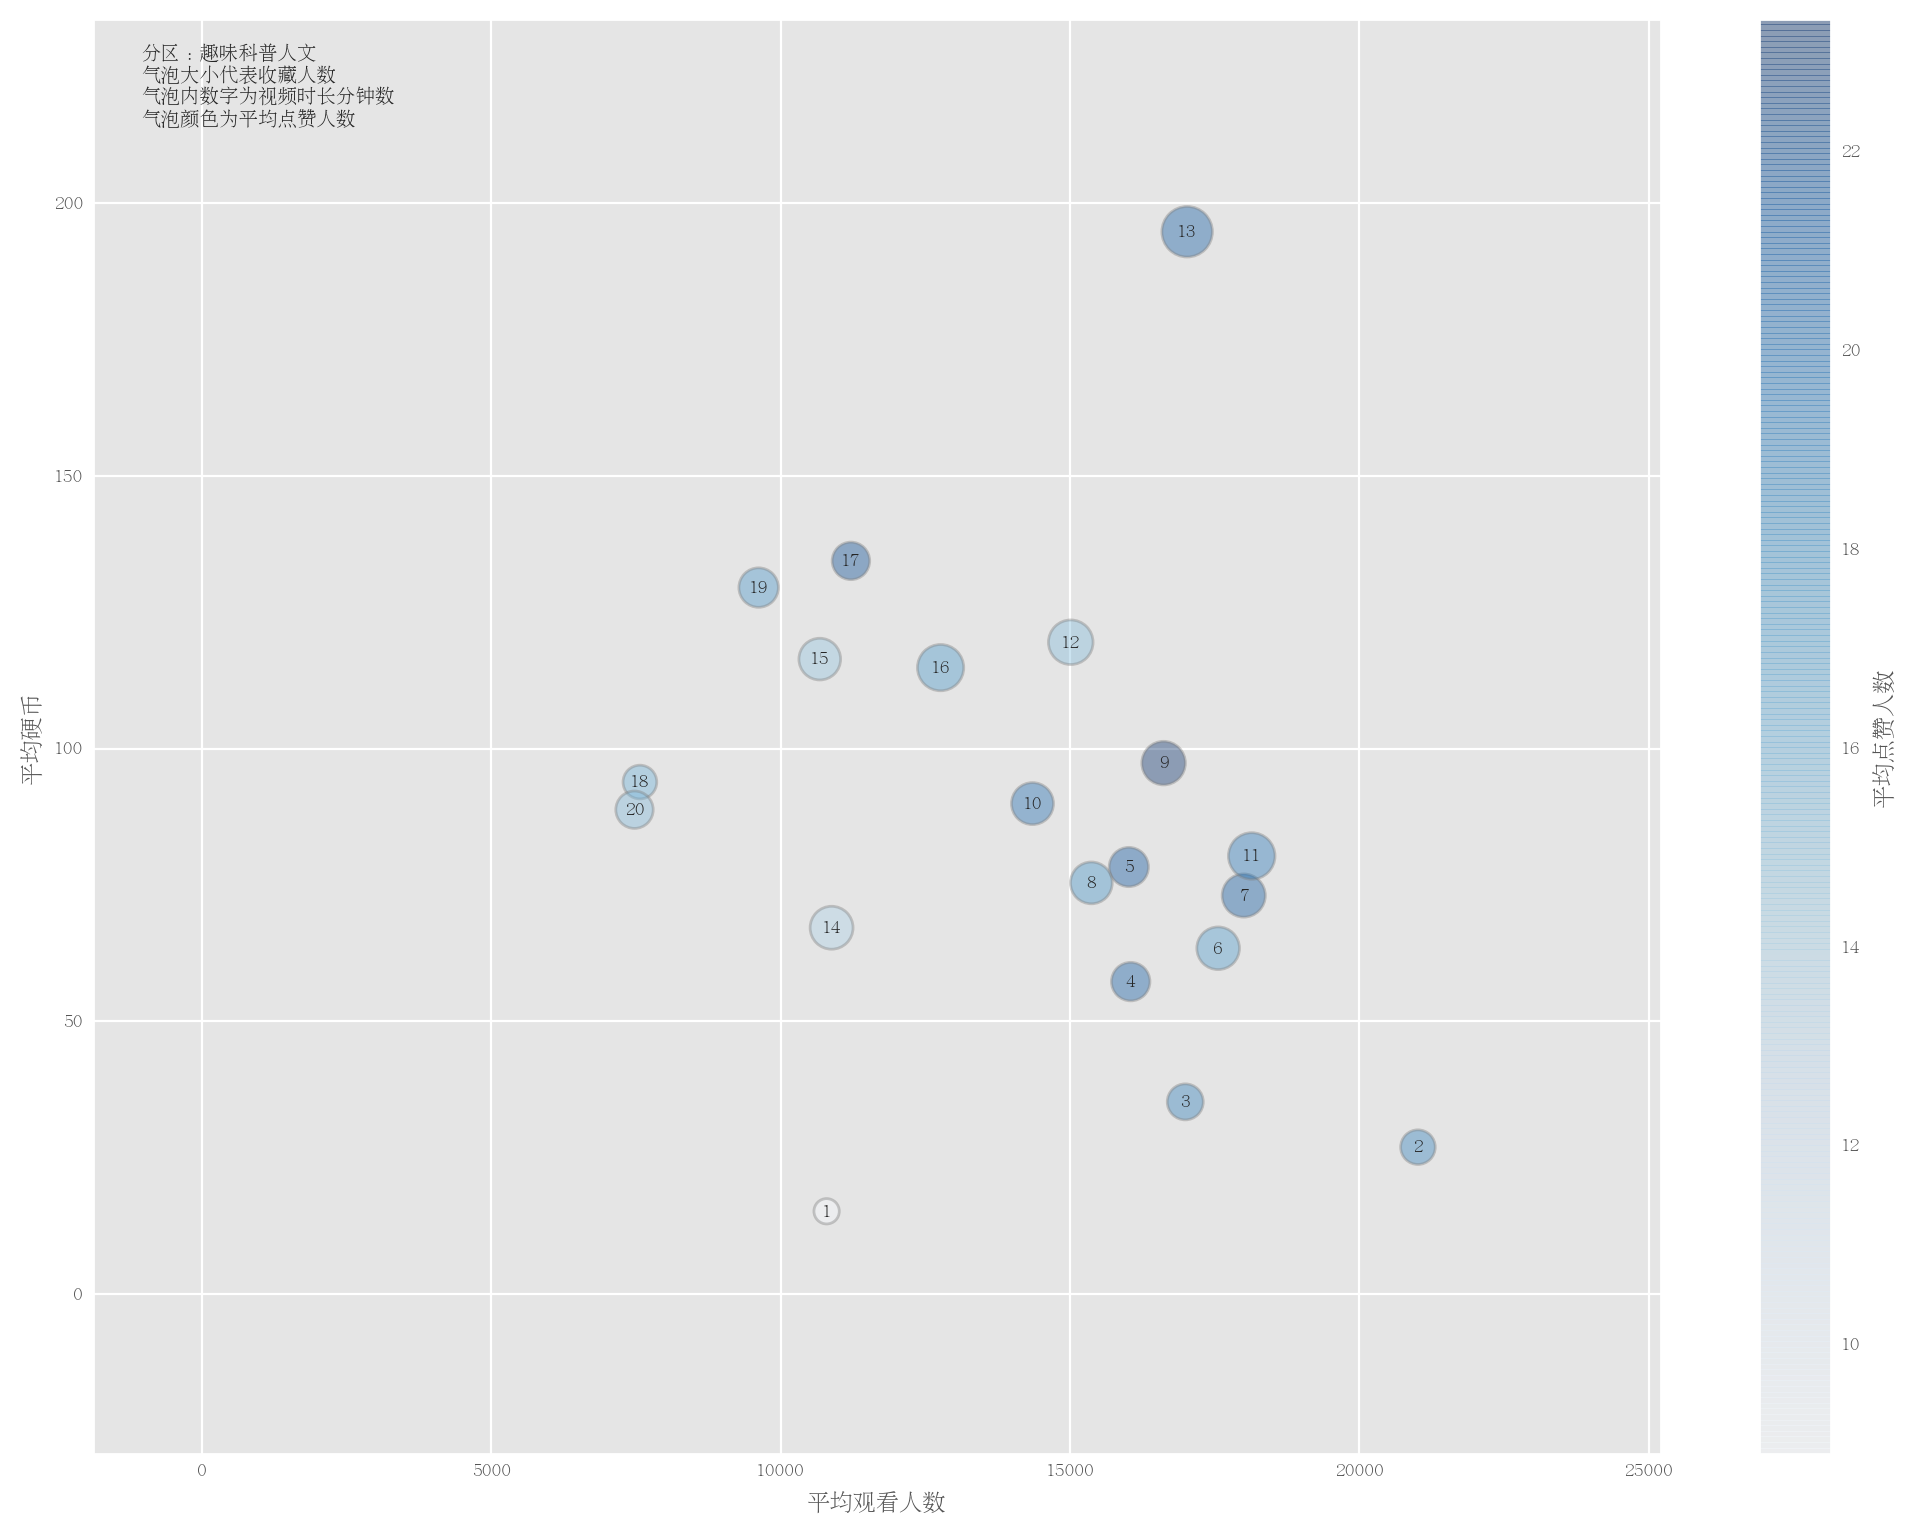

In [61]:
max_views = df_du_tech.max()['view']
max_coins = df_du_tech.max()['coin']
max_favorite = df_du_tech.max()['favorite']


# plt.rc('font', family='BabelStone Han', size=7)  # 选择你自己电脑上的字体

fig_tech, ax_tech = plt.subplots(1,1, figsize=(fig_w/my_dpi, fig_h/my_dpi), dpi=my_dpi)
plt_tech = ax_tech.scatter(df_du_tech['view'].values, df_du_tech['coin'].values, s=df_du_tech['favorite'].values, c=df_du_tech['like'].values, cmap="Blues", alpha=0.4, edgecolors="grey", linewidth=1)

for i, txt in enumerate( df_du_tech['duration'].values ):
    ax_tech.annotate(txt, ( (df_du_tech['view'].values)[i], (df_du_tech['coin'].values)[i] ), ha='center', va='center')

plt.annotate(
    '分区：趣味科普人文' +'\n' +
    '气泡大小代表收藏人数' + '\n'+
    '气泡内数字为视频时长分钟数' + '\n' +
    '气泡颜色为平均点赞人数',
    xy=(-0.05*max_views, 1.1*max_coins))

    
ax_tech.set(xlim =[-0.09*max_views,max_views*1.2], ylim =[-0.15*max_coins,max_coins*1.2])
ax_tech.set(xlabel= '平均观看人数', ylabel='平均硬币')
plt.colorbar(plt_tech, label='平均点赞人数')
plt.show()

We might conclude from the figure above that videos aiming for coins should have duration 17min, 19min.

However, it's obviously not reliable. Naively, we do not expect the average coin to change a lot if we go from 17 to 19 continuously.

### All Sectors

Save all the videos with durations up to 20min

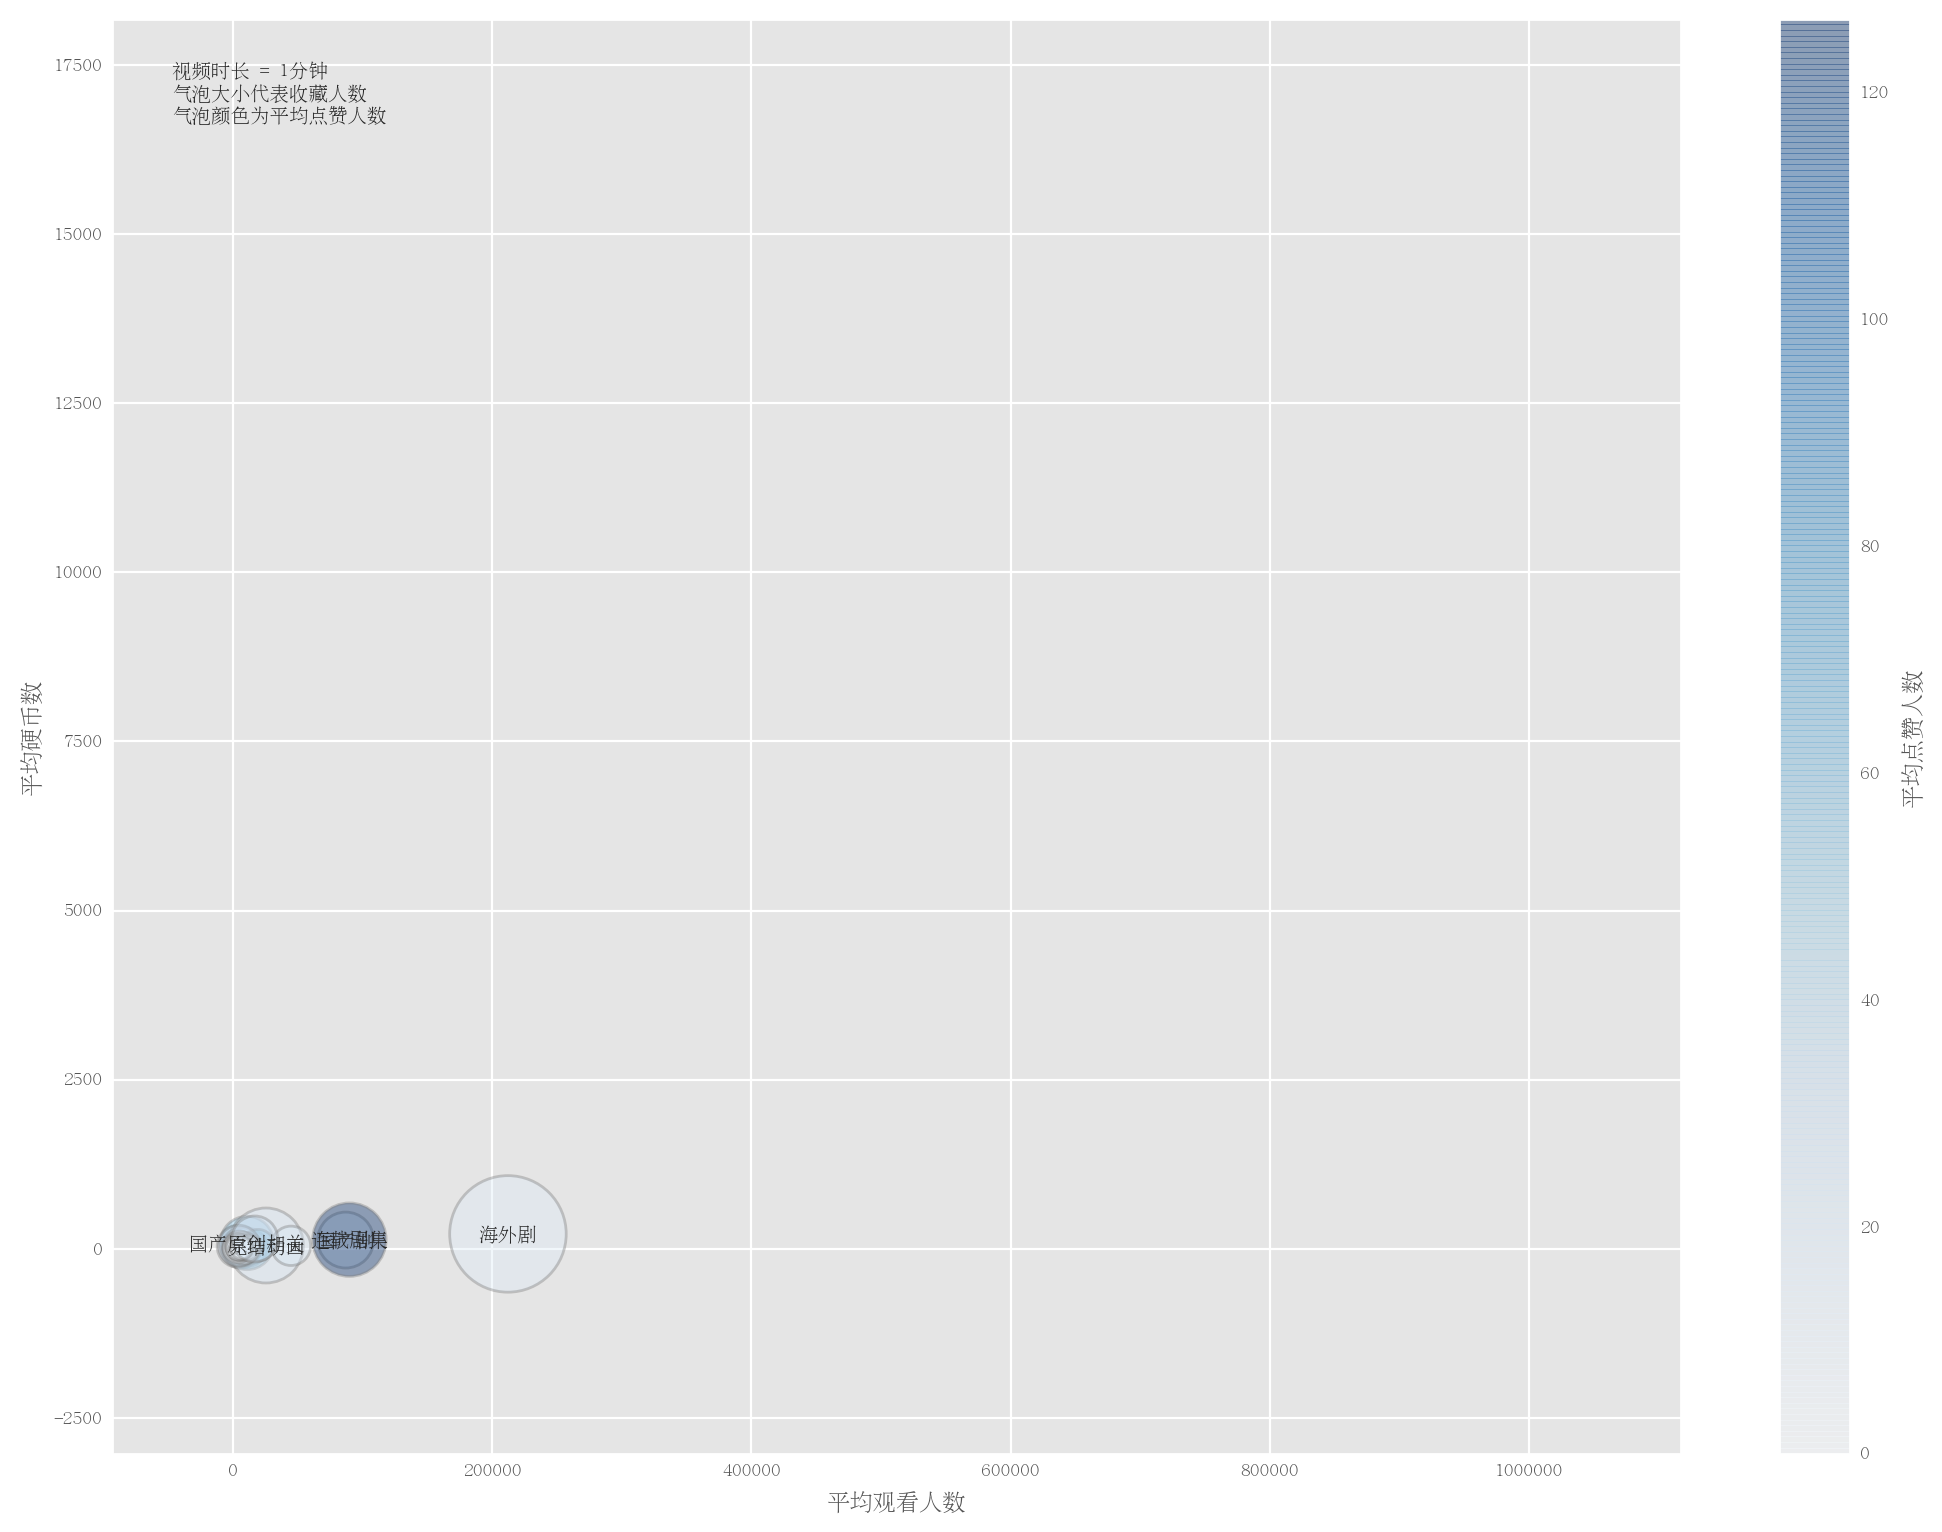

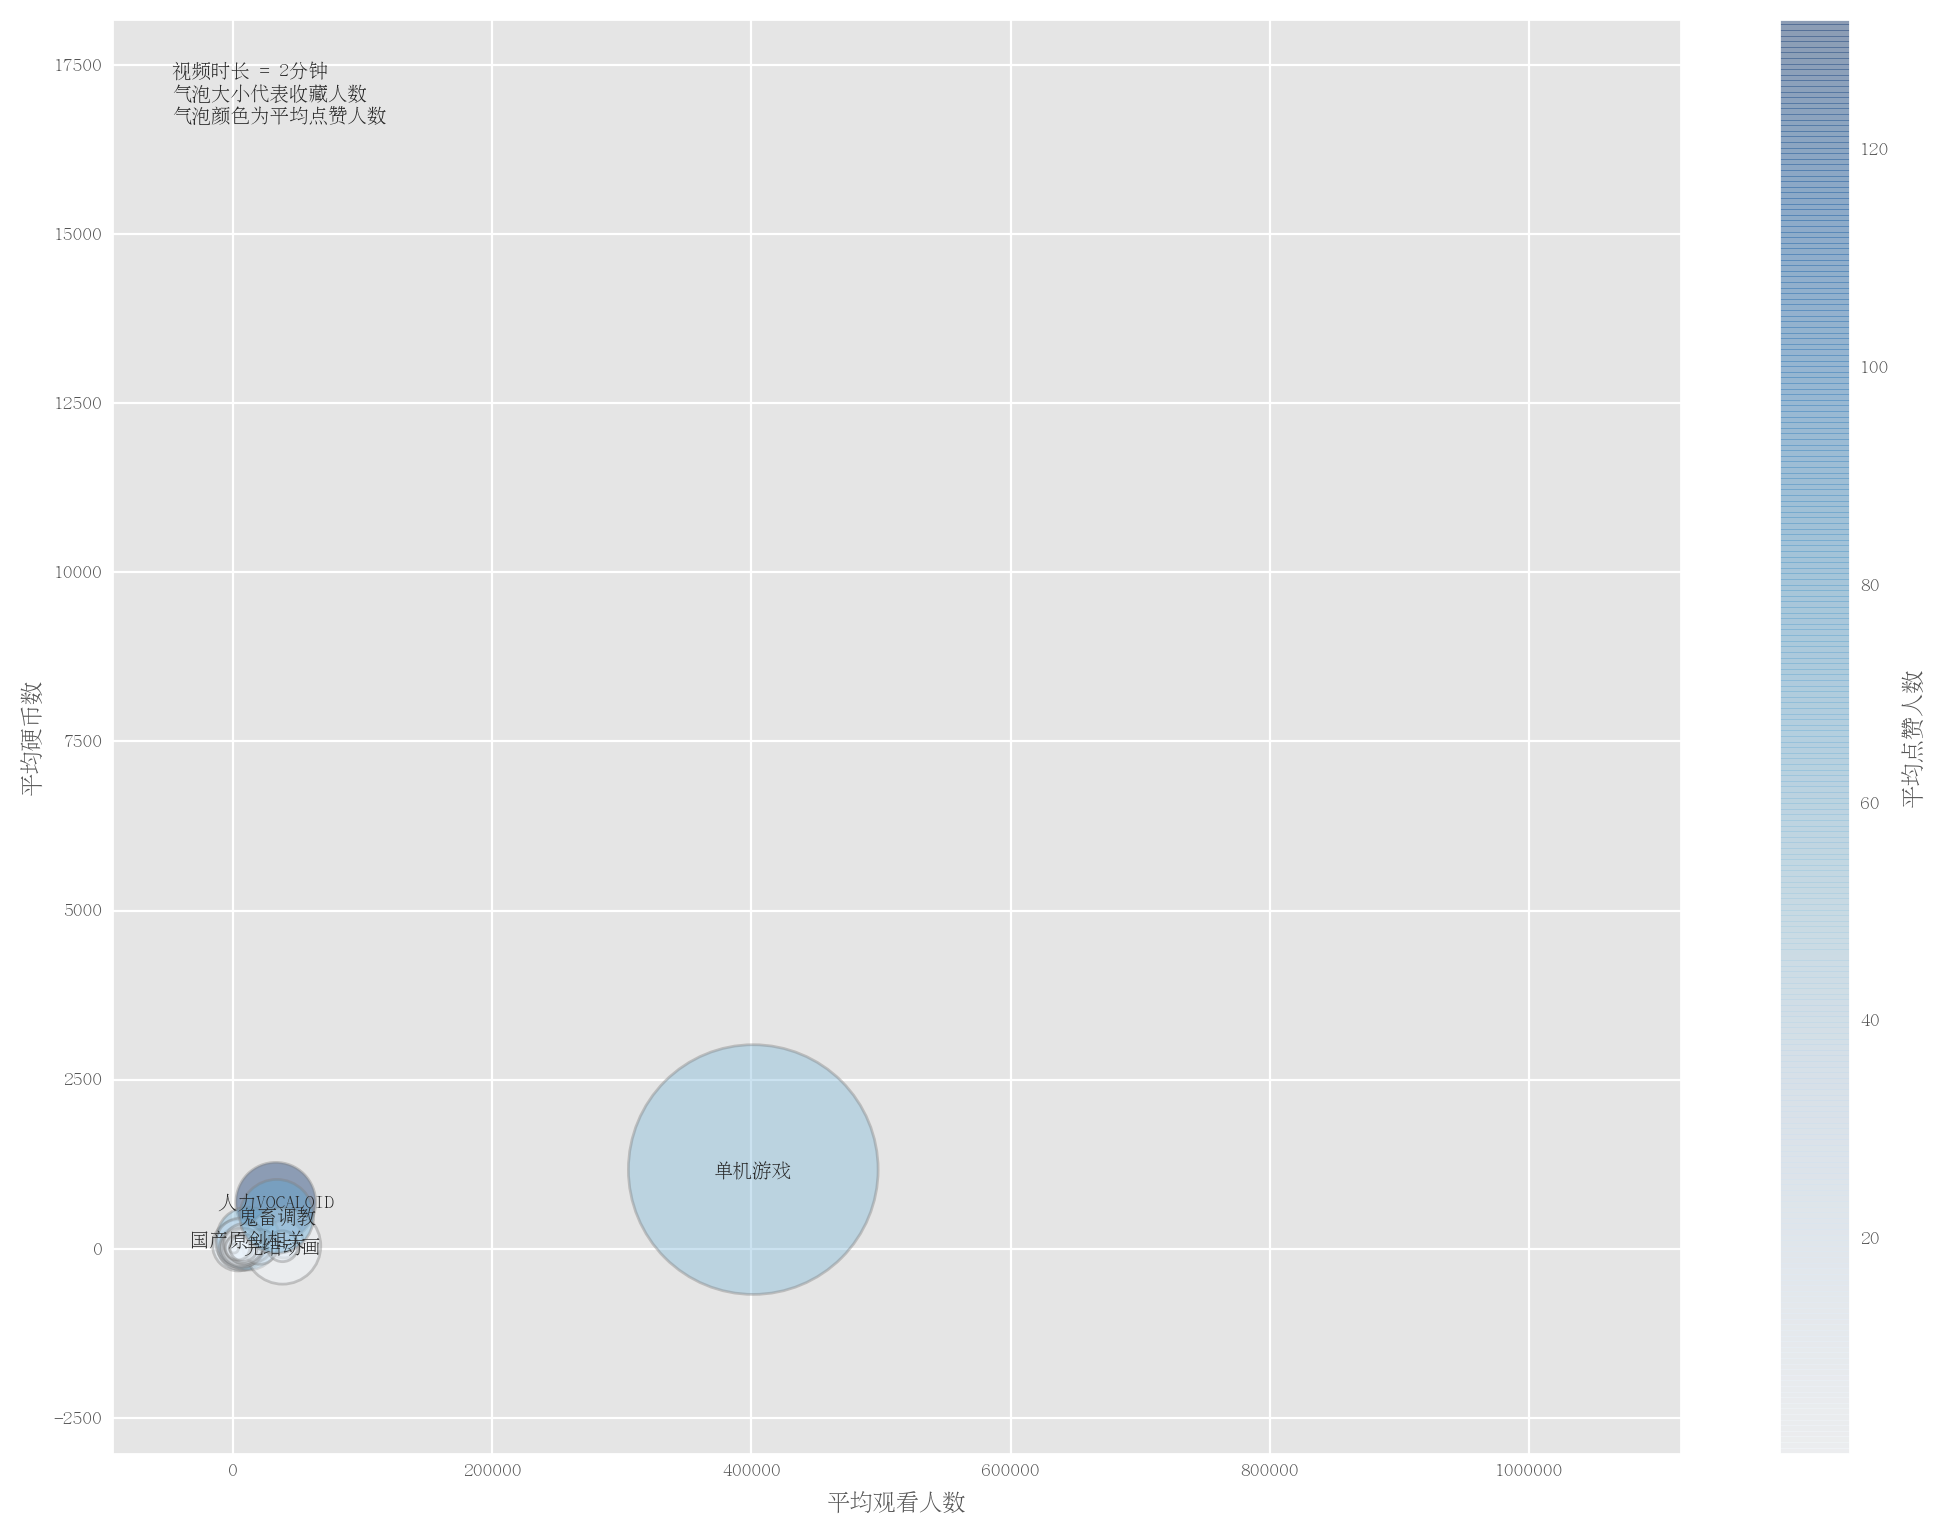

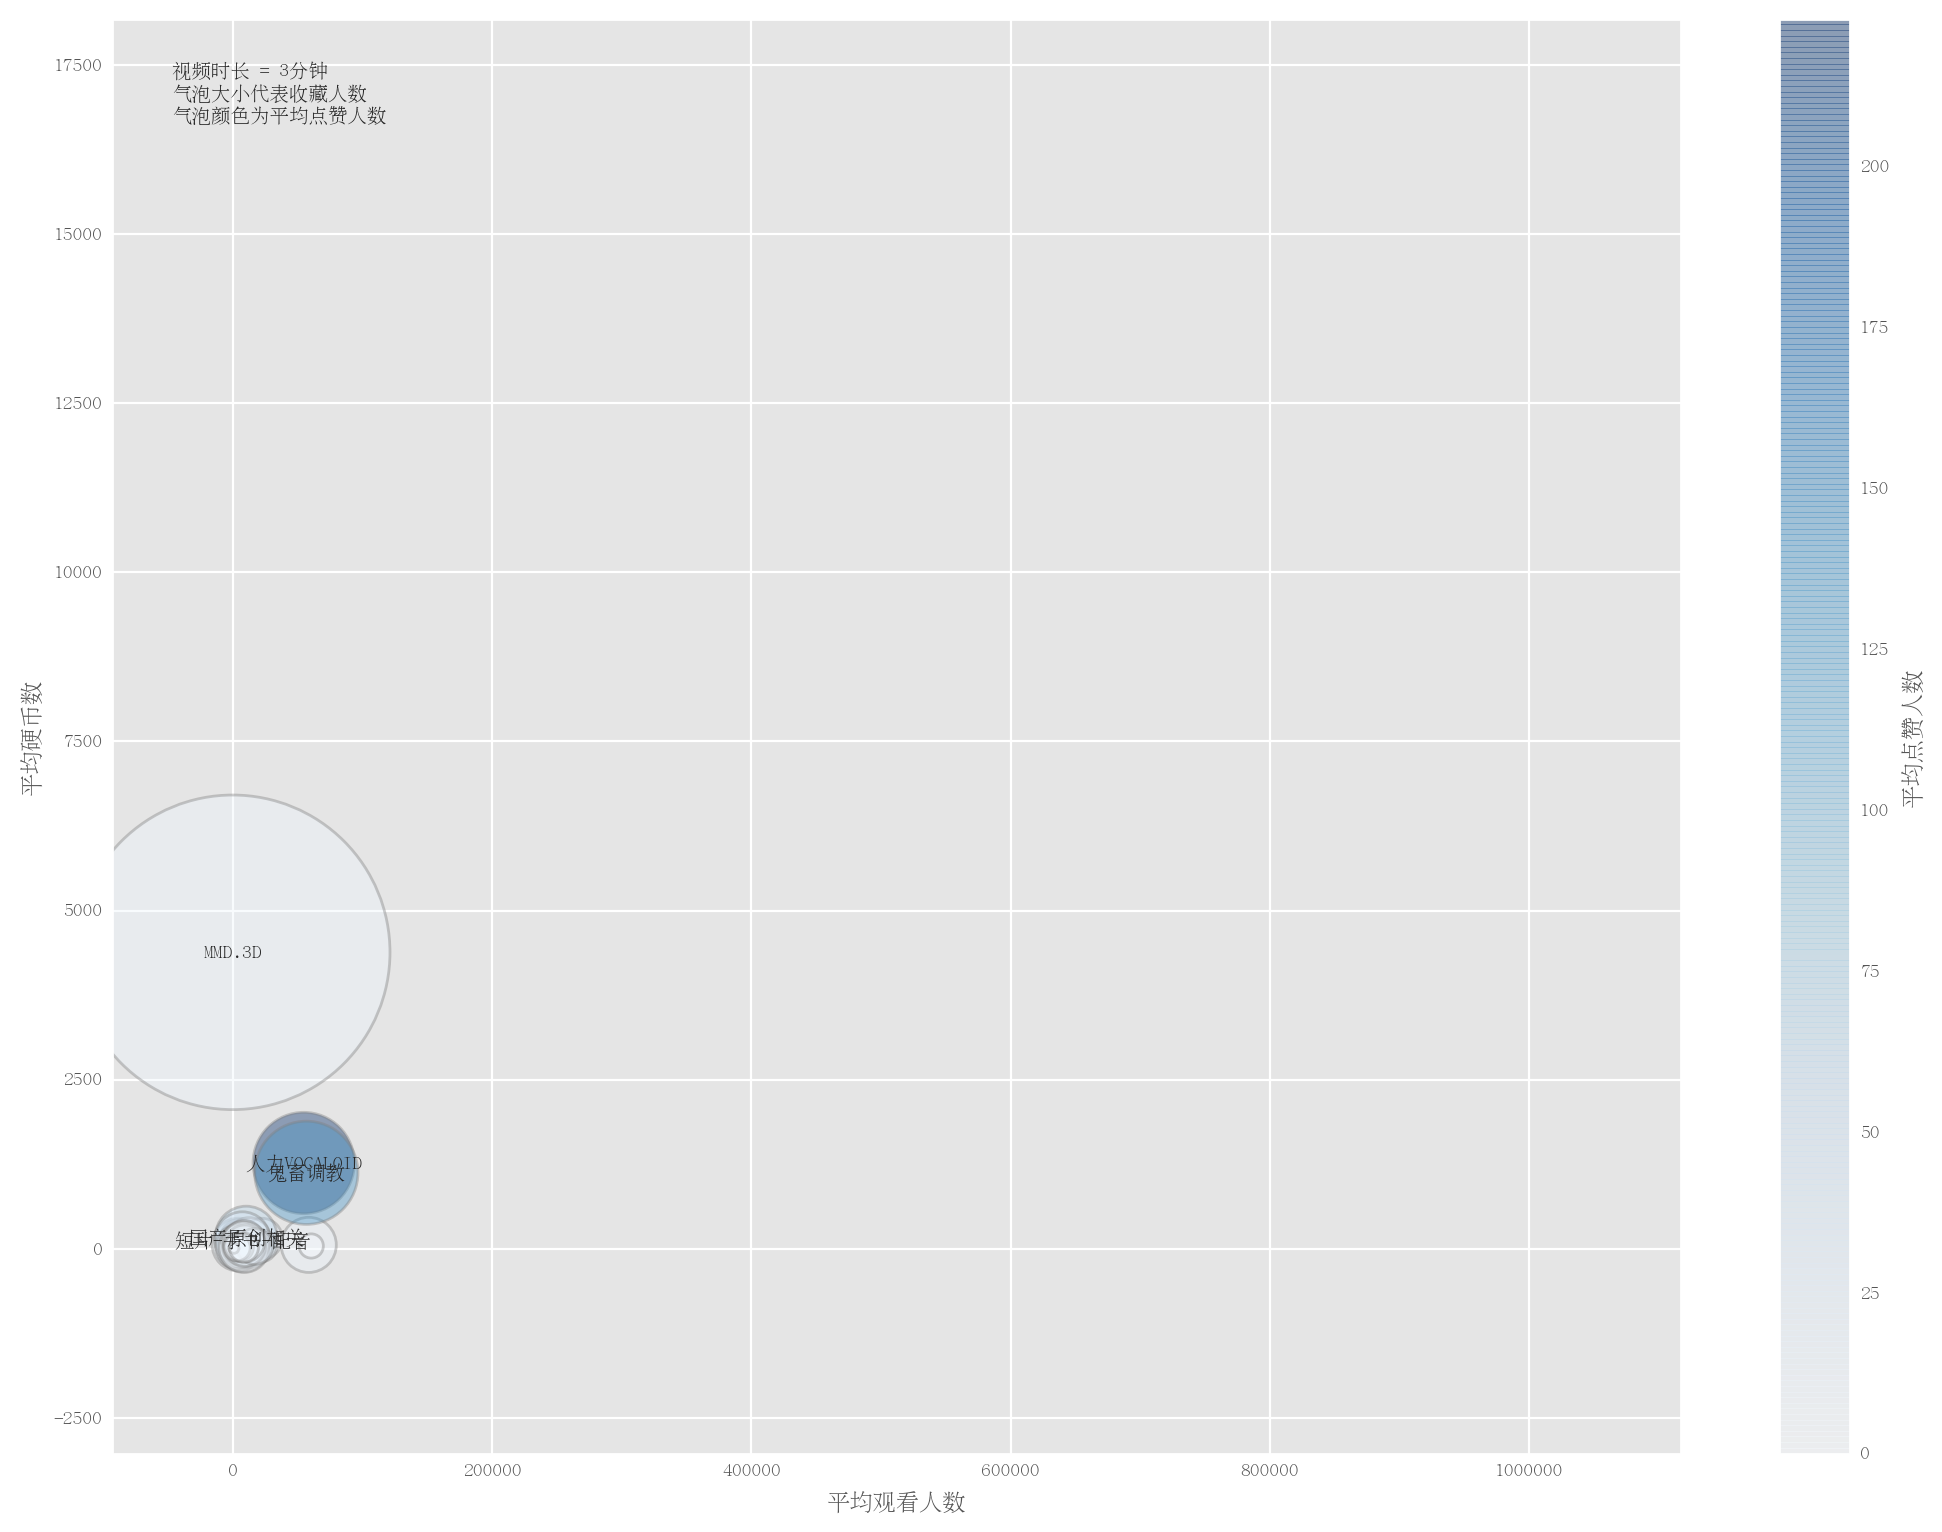

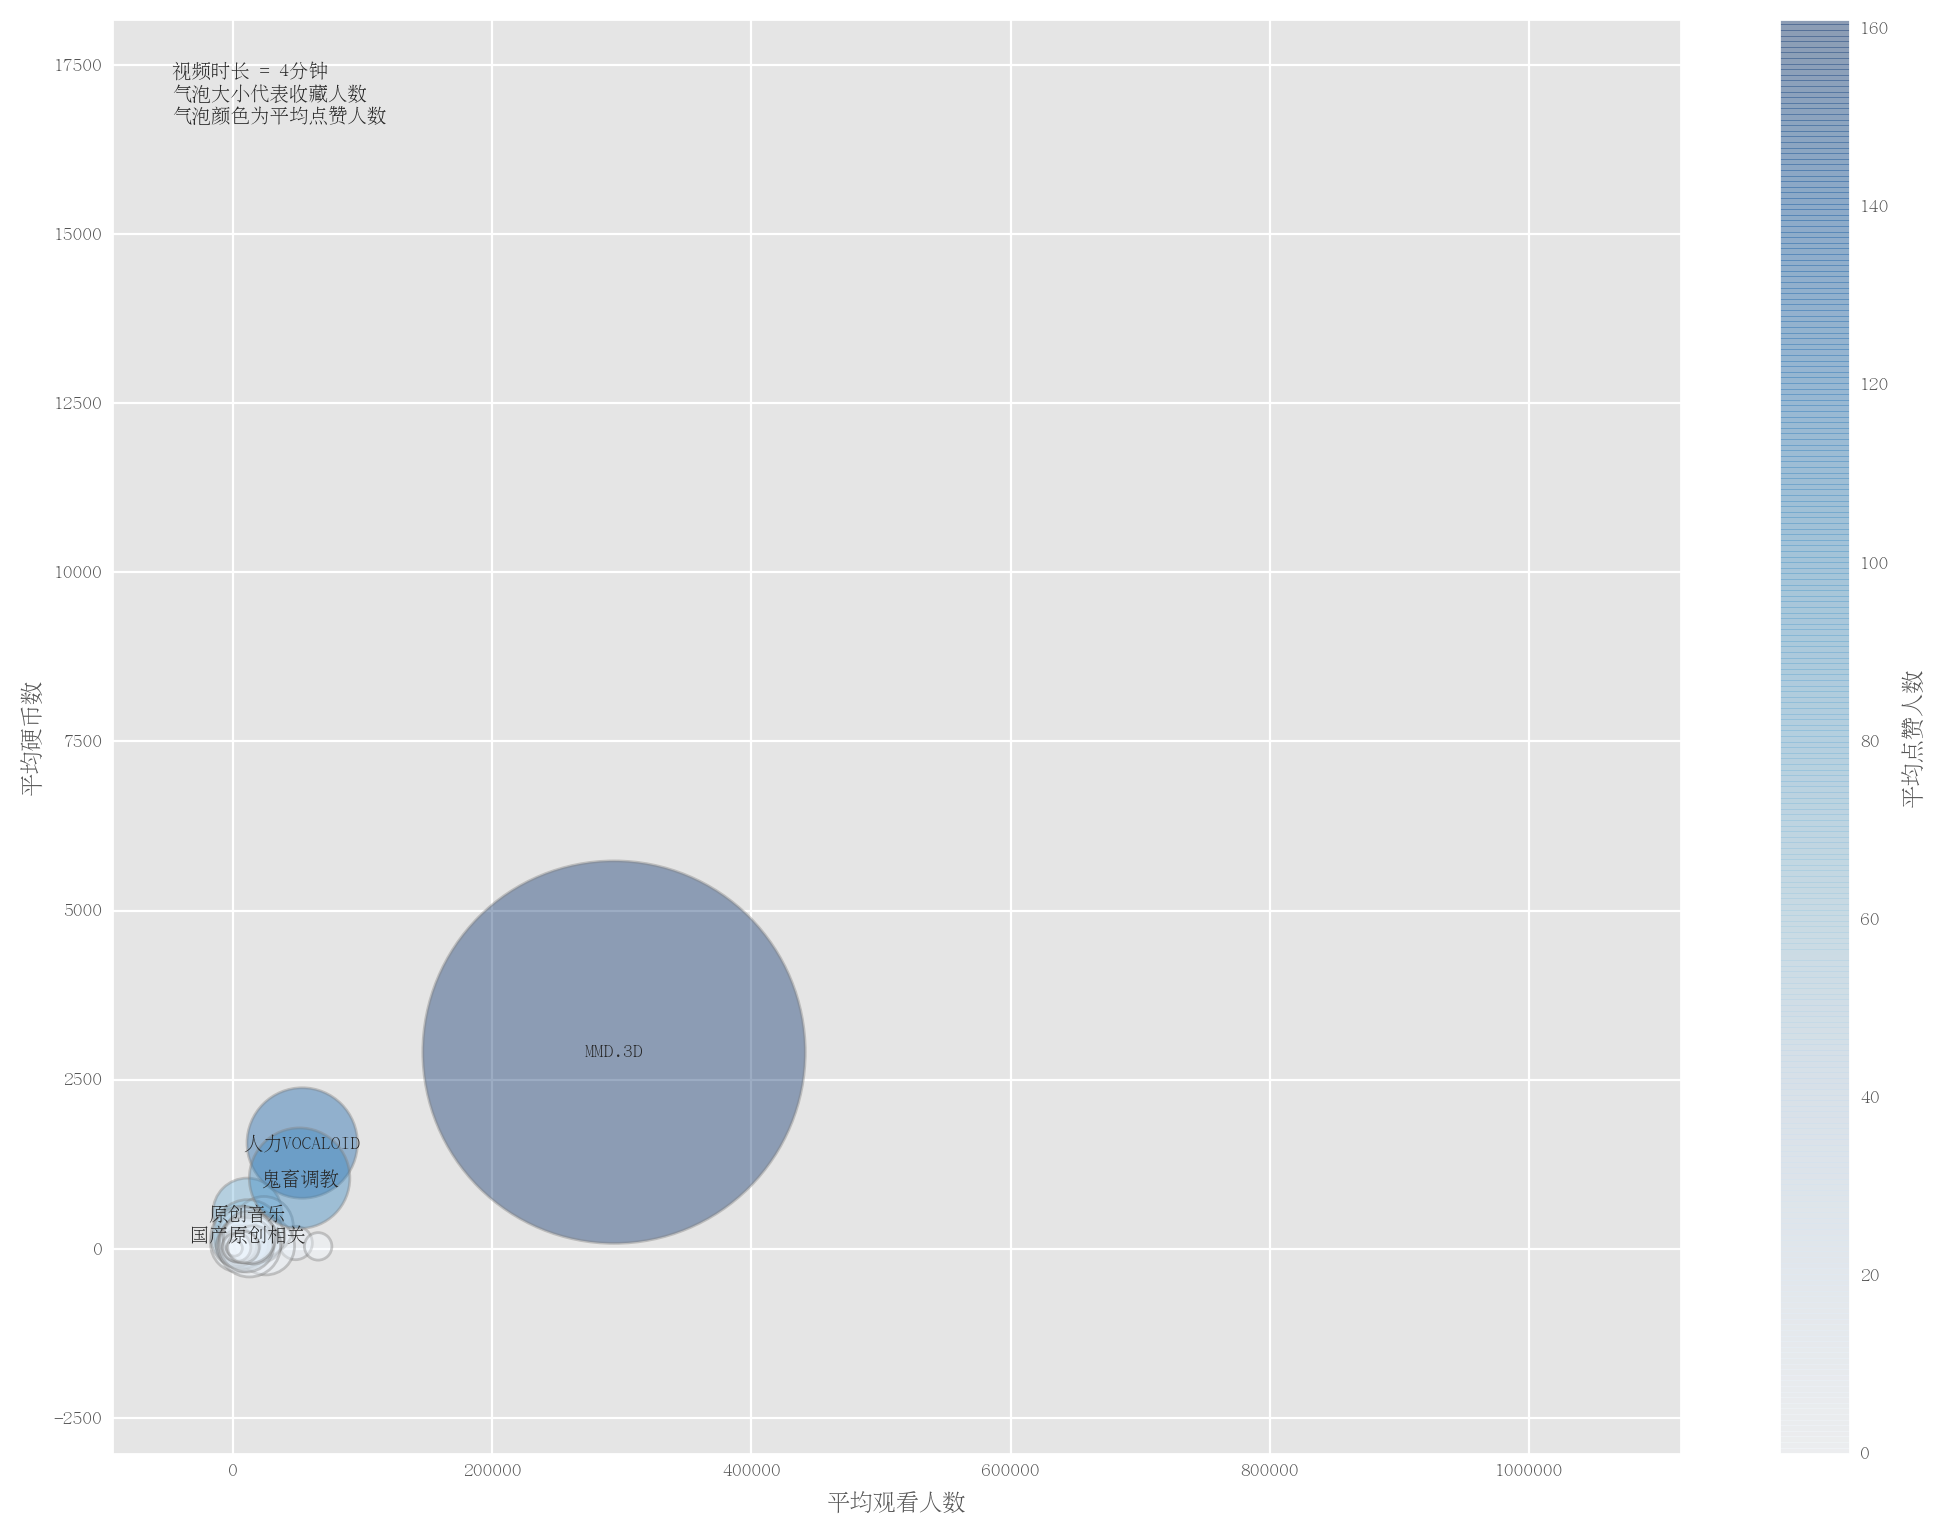

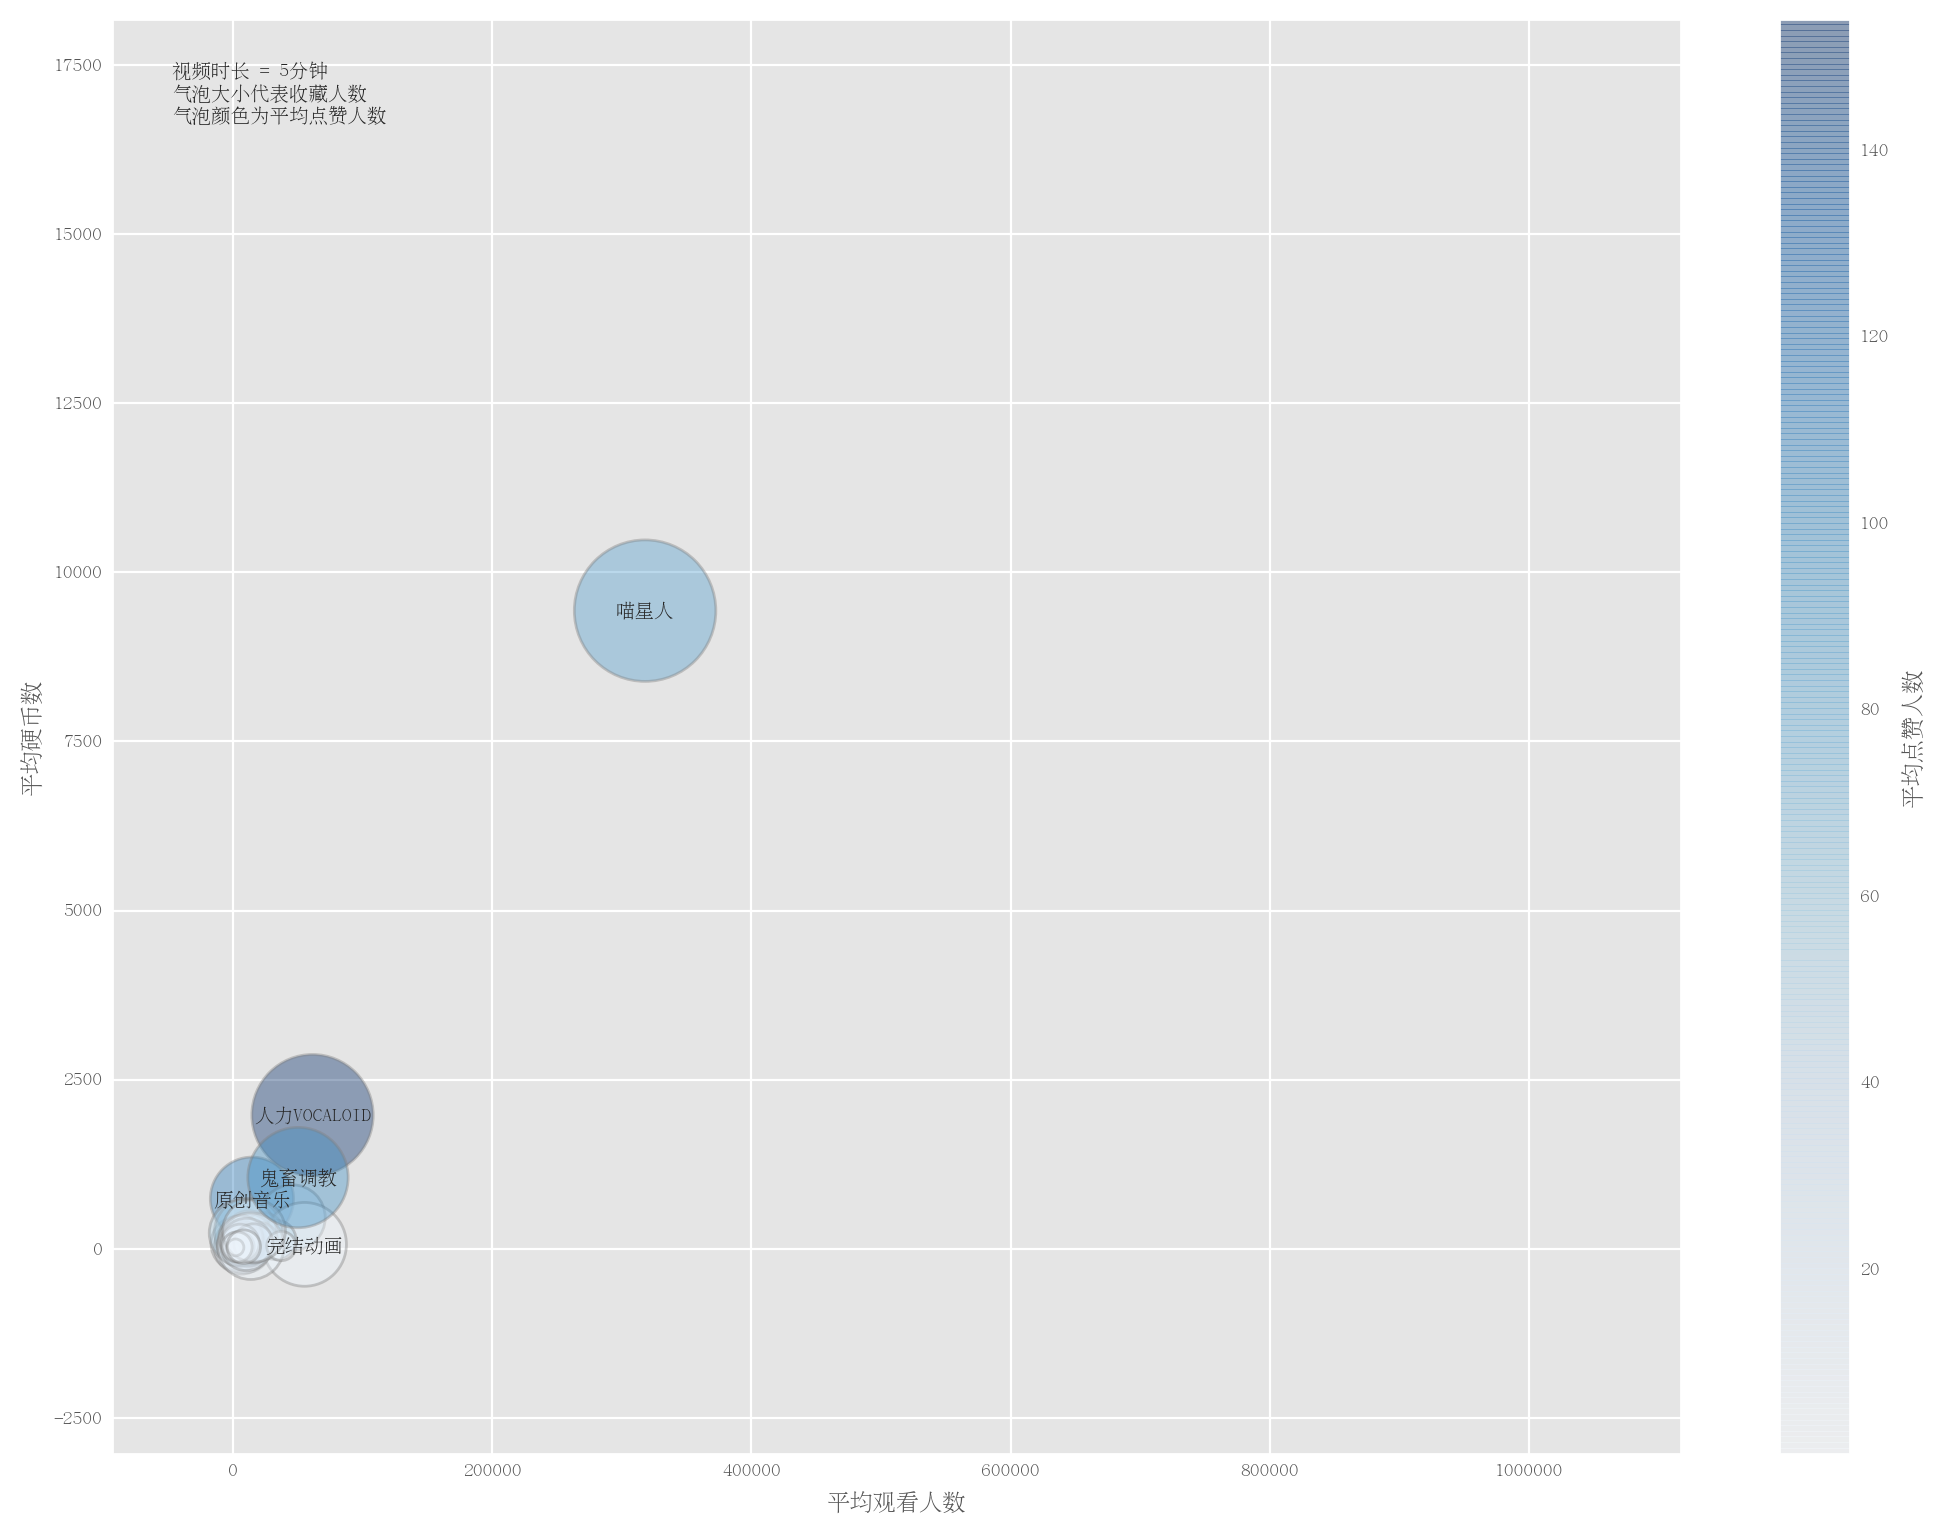

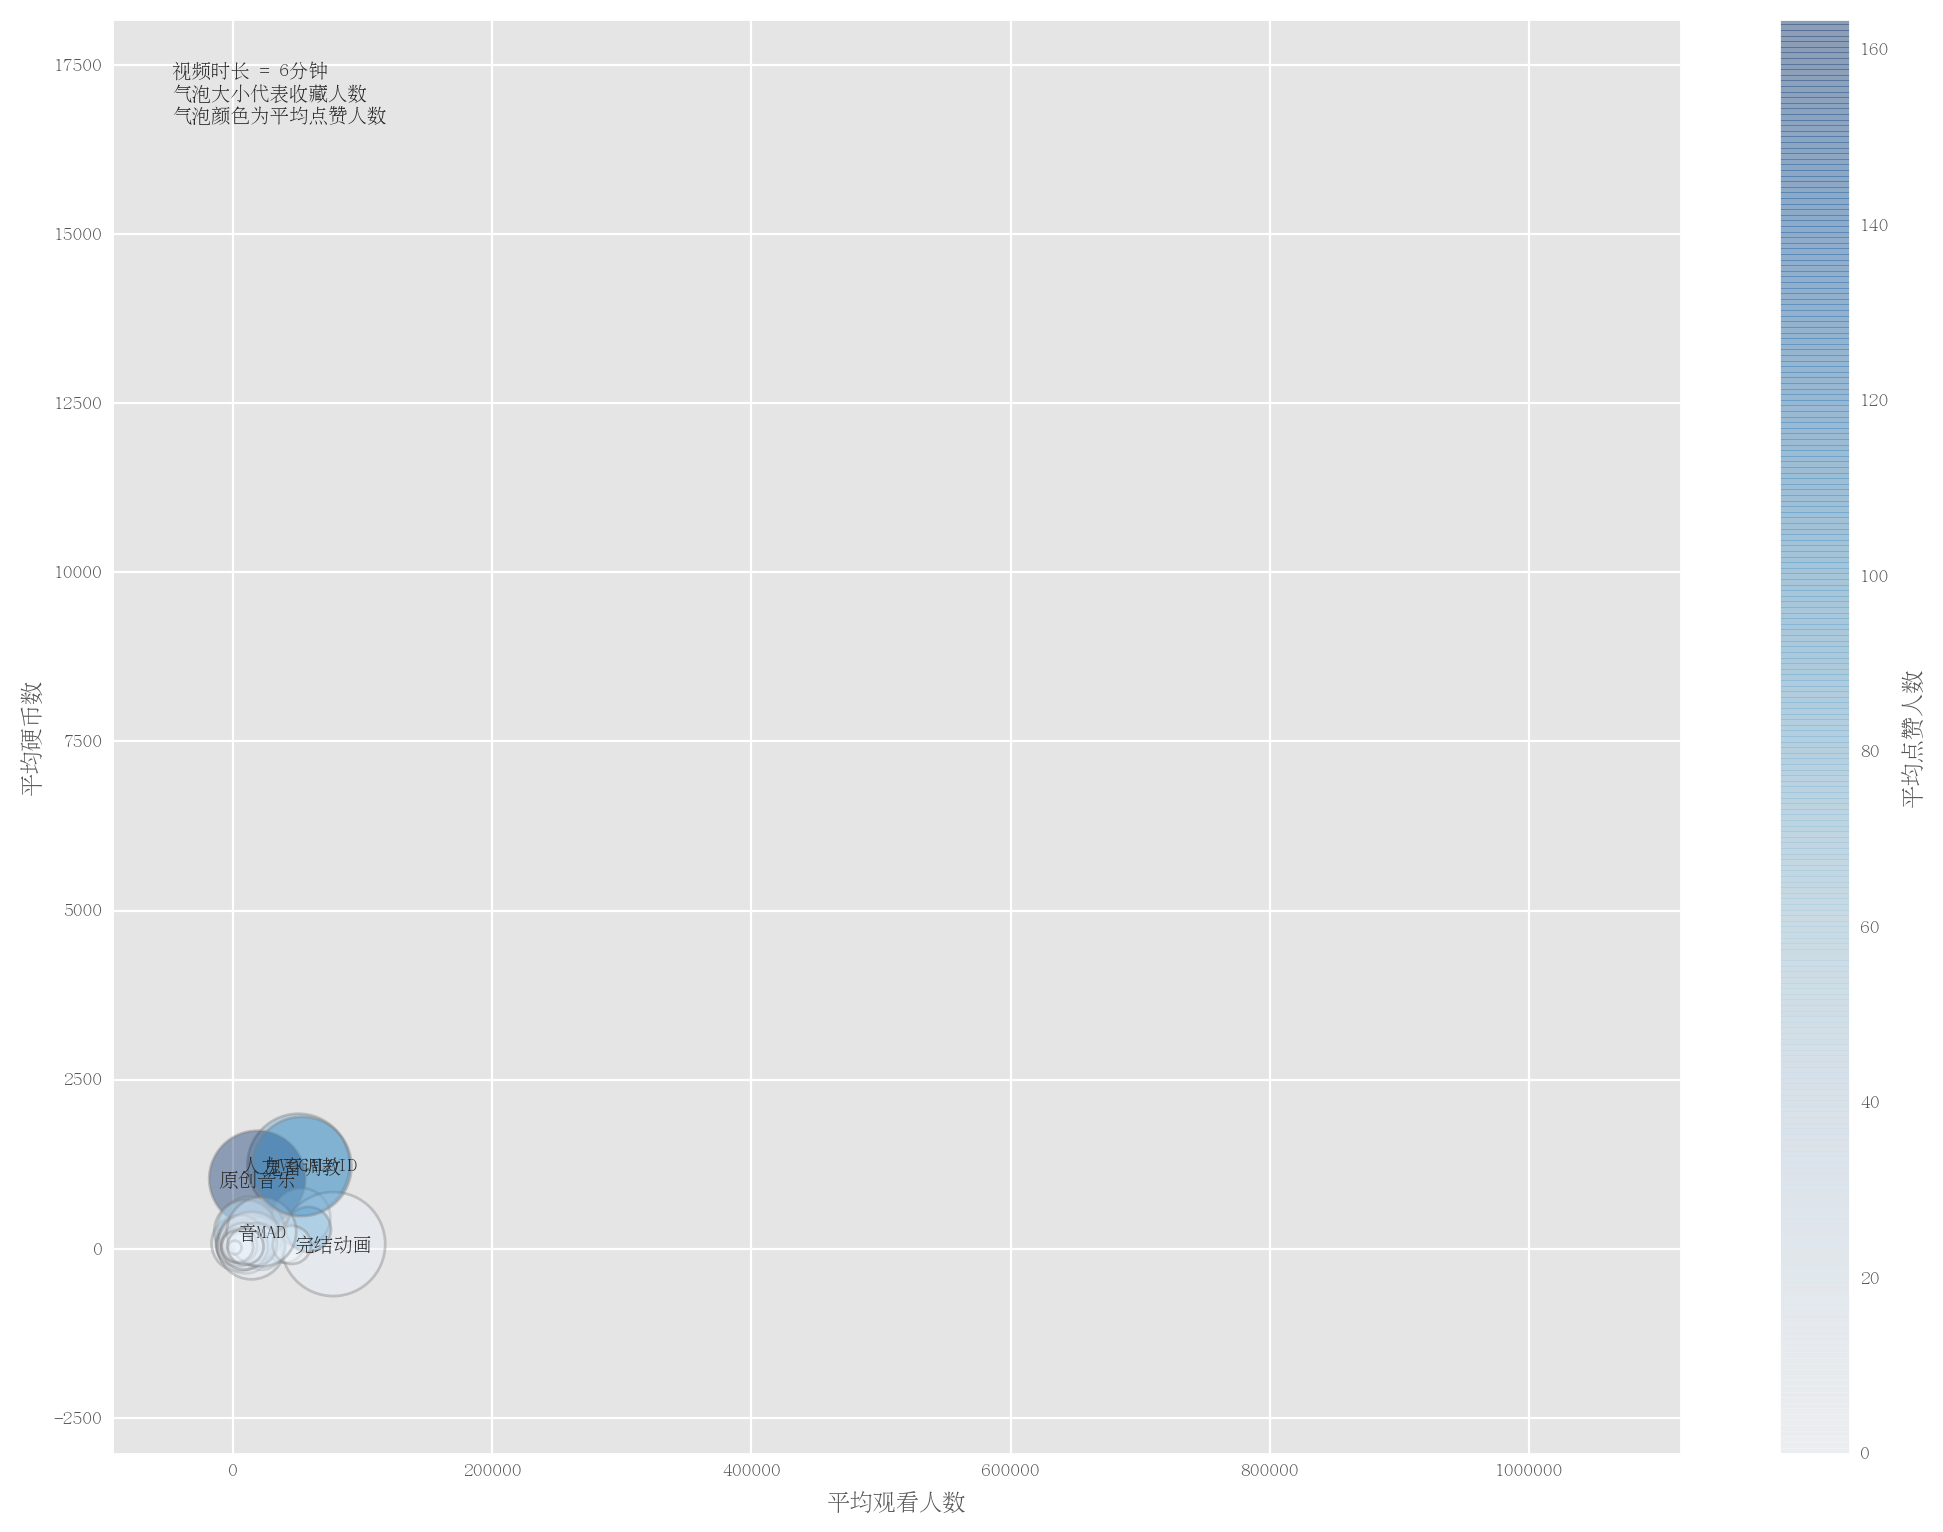

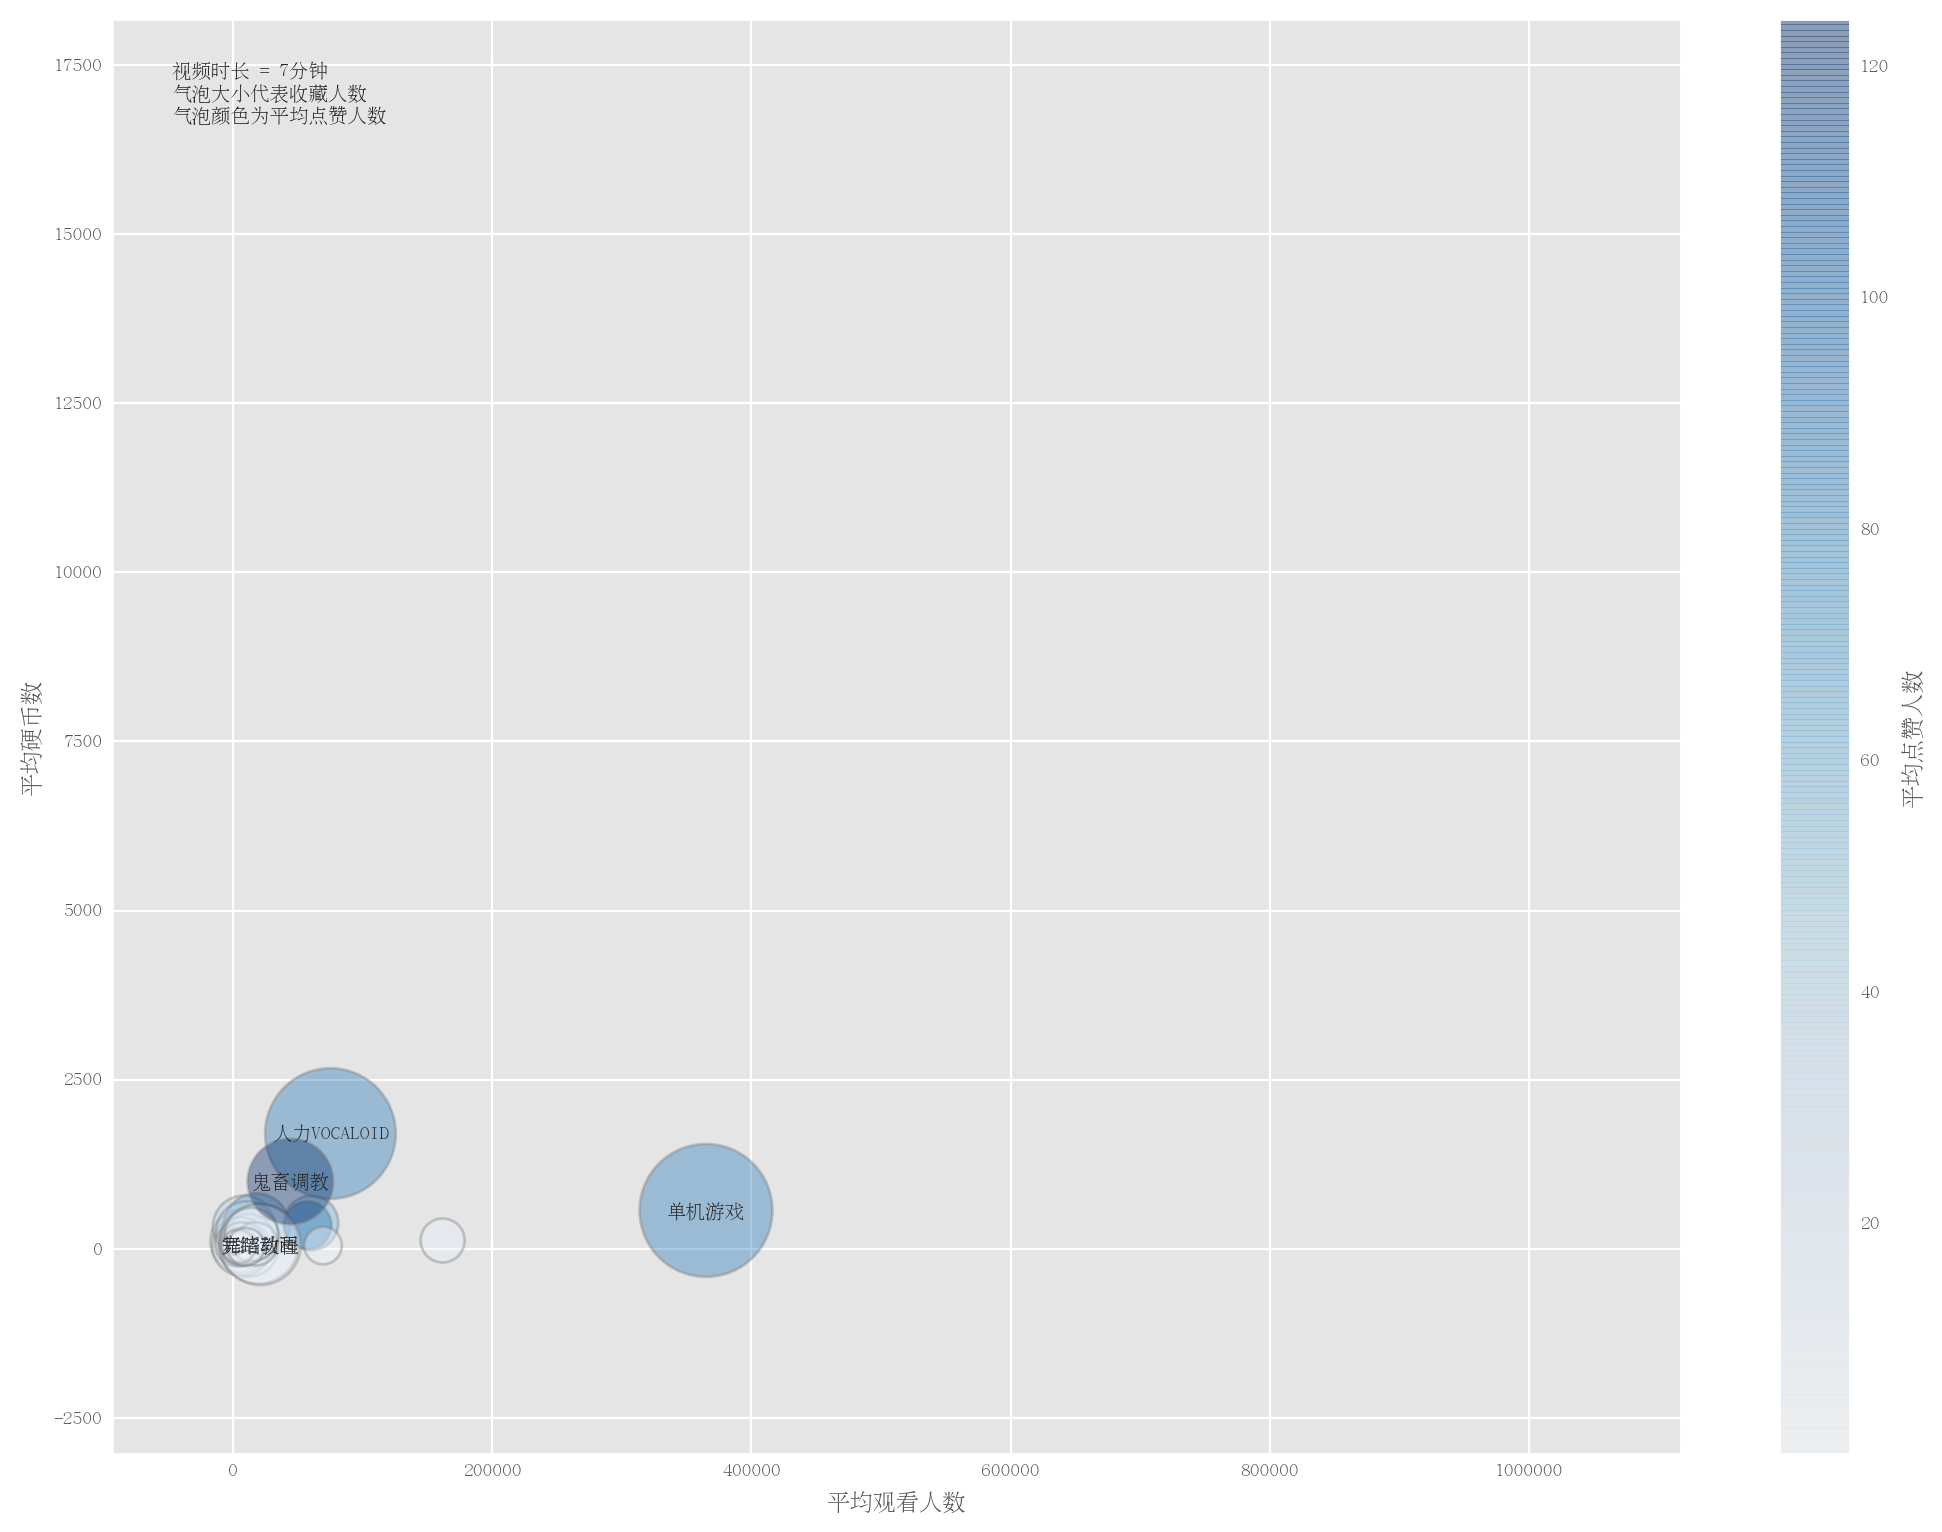

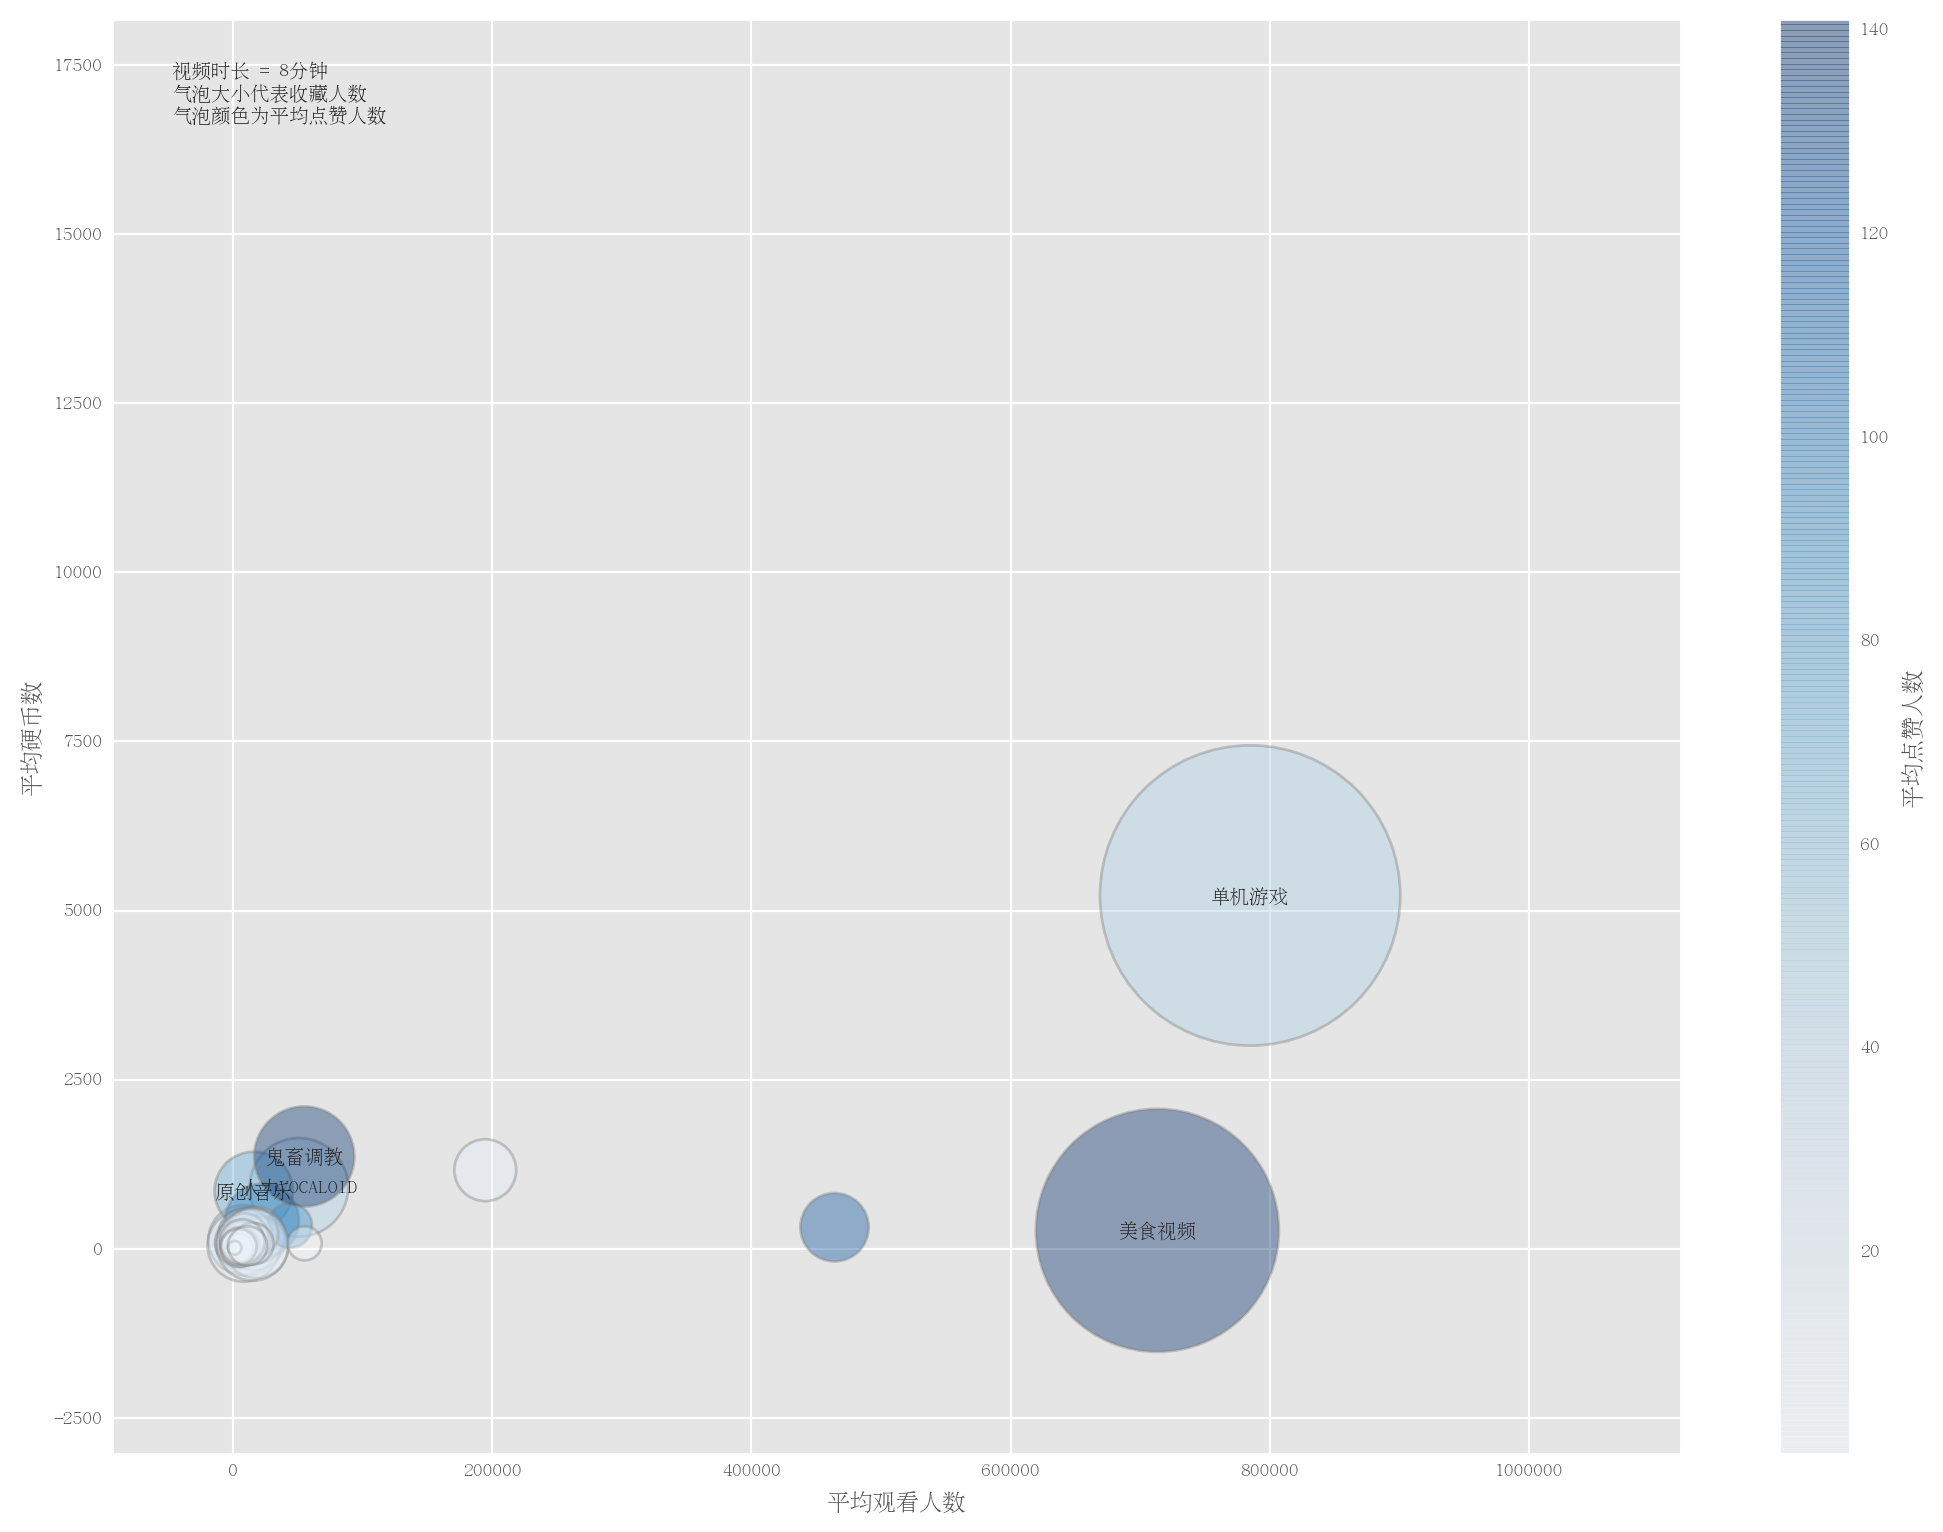

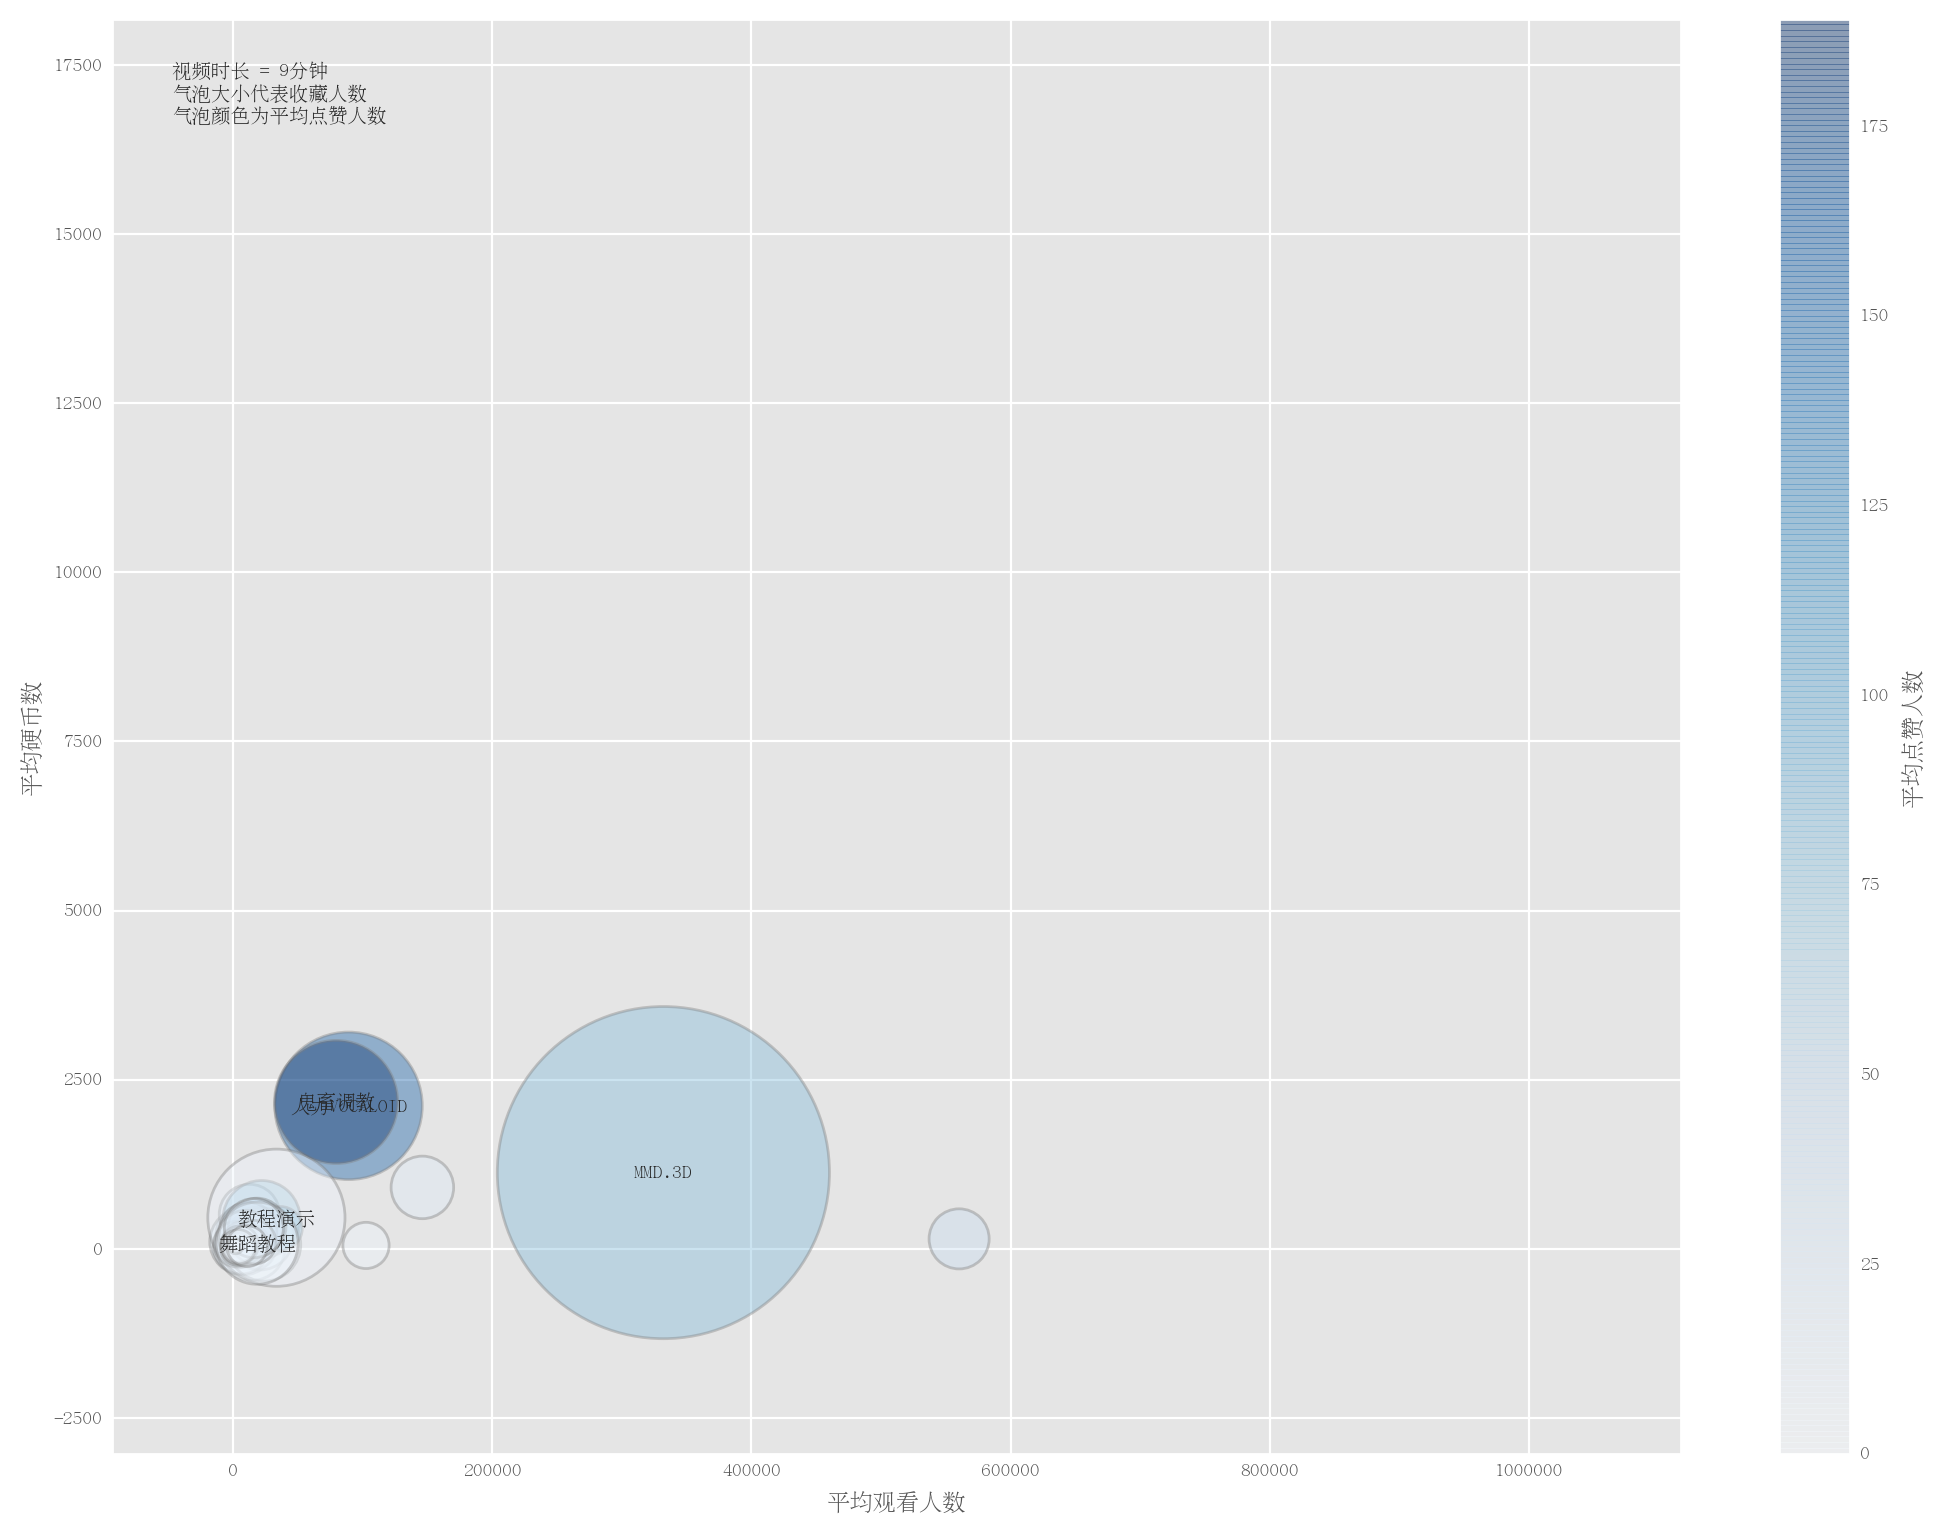

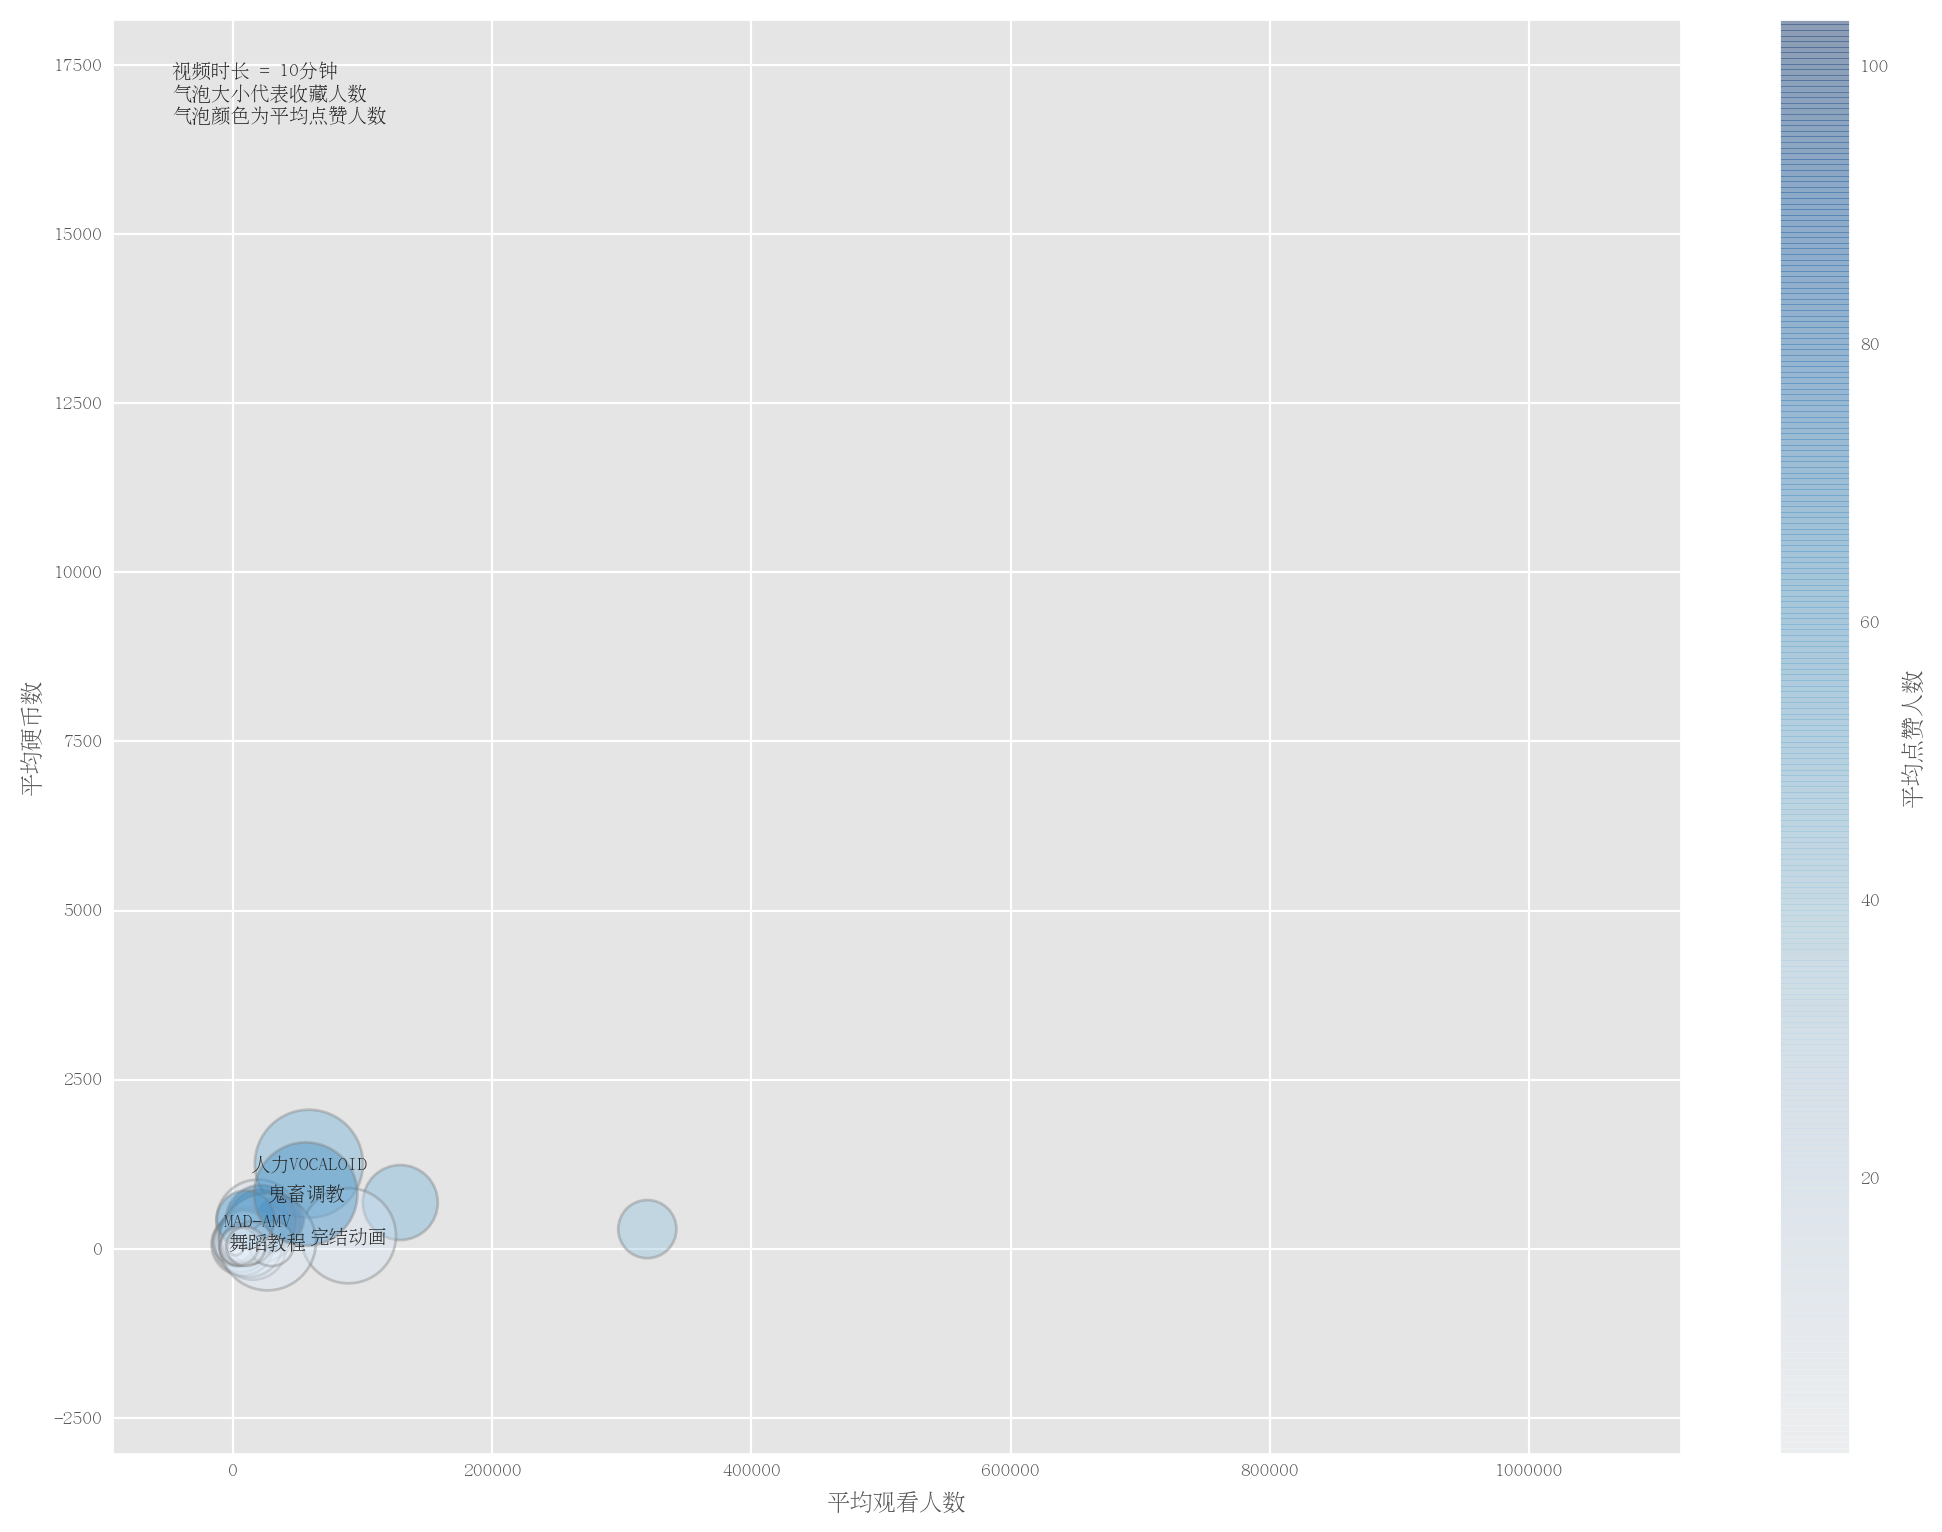

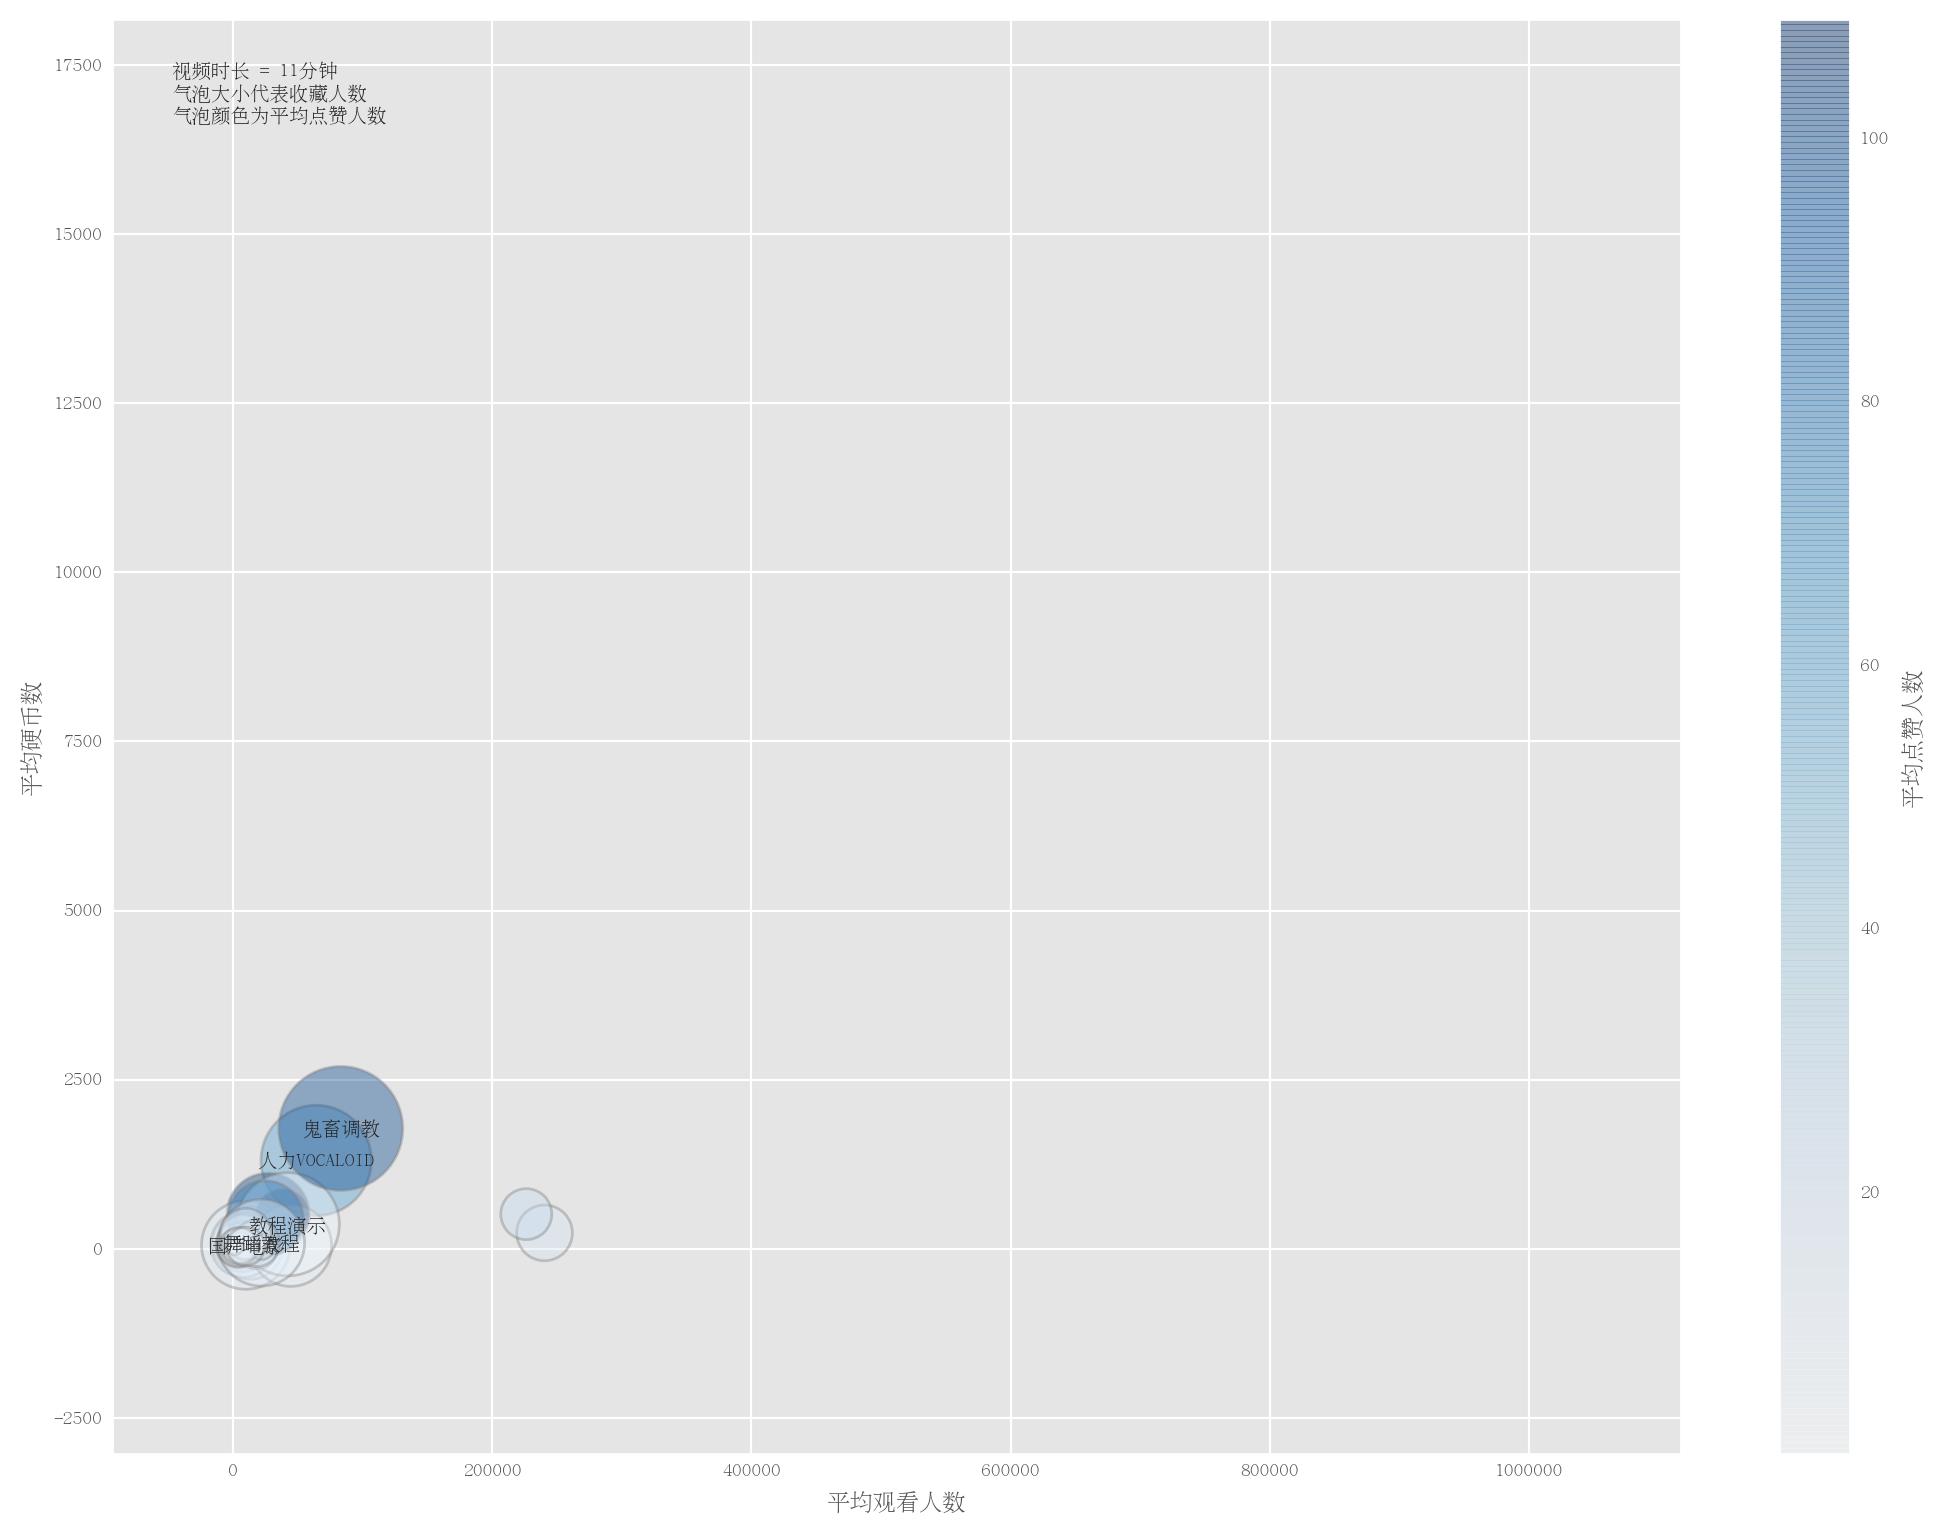

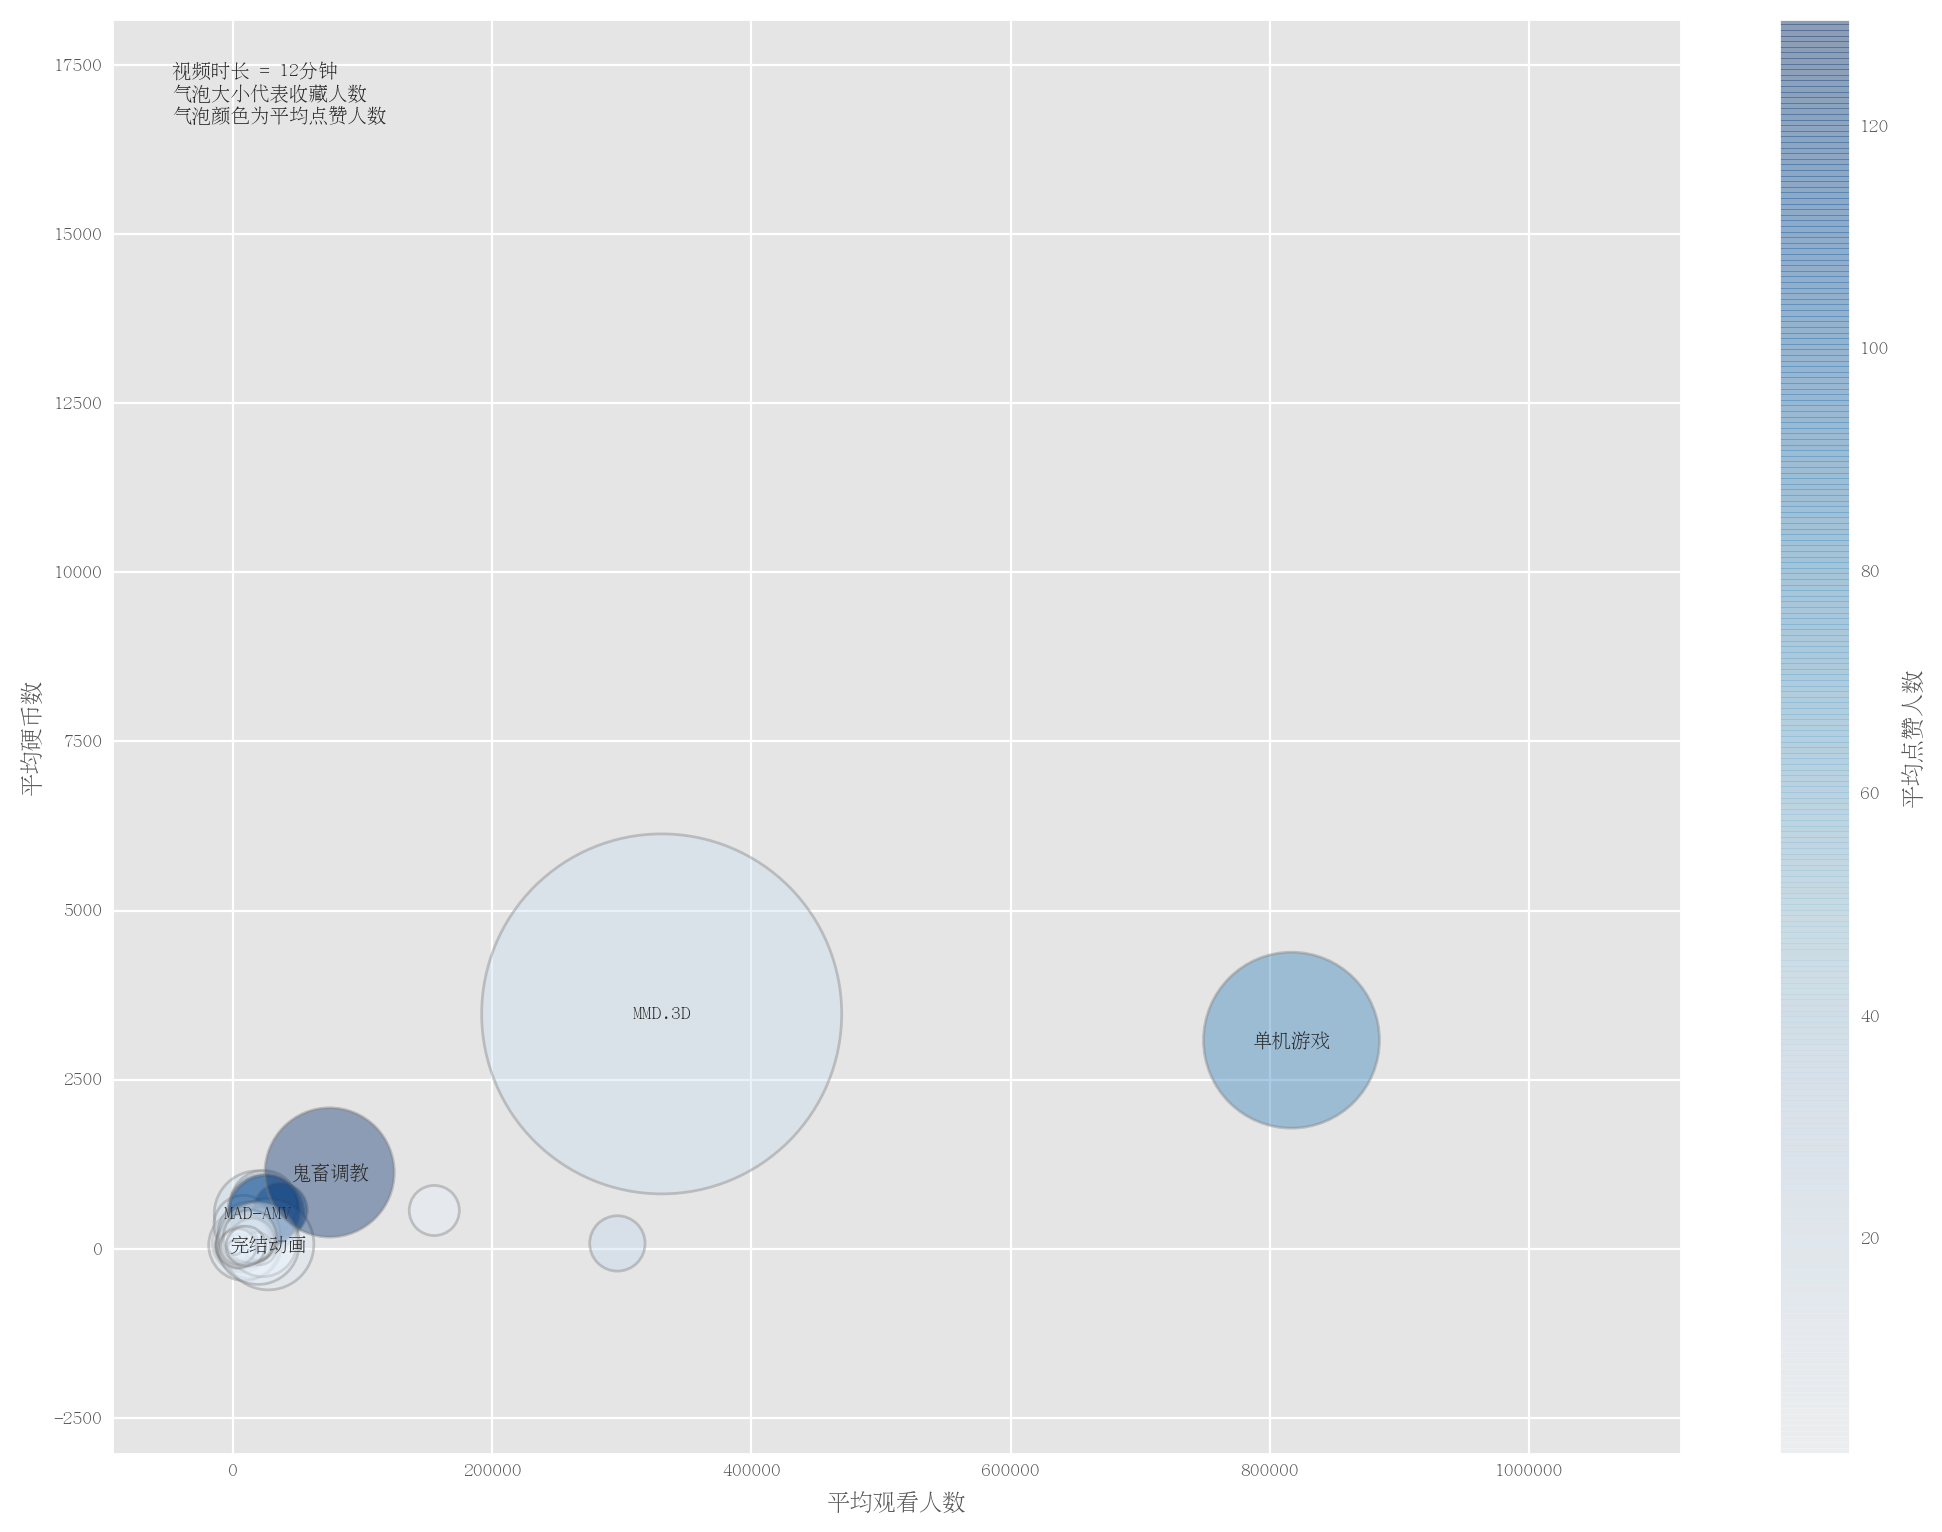

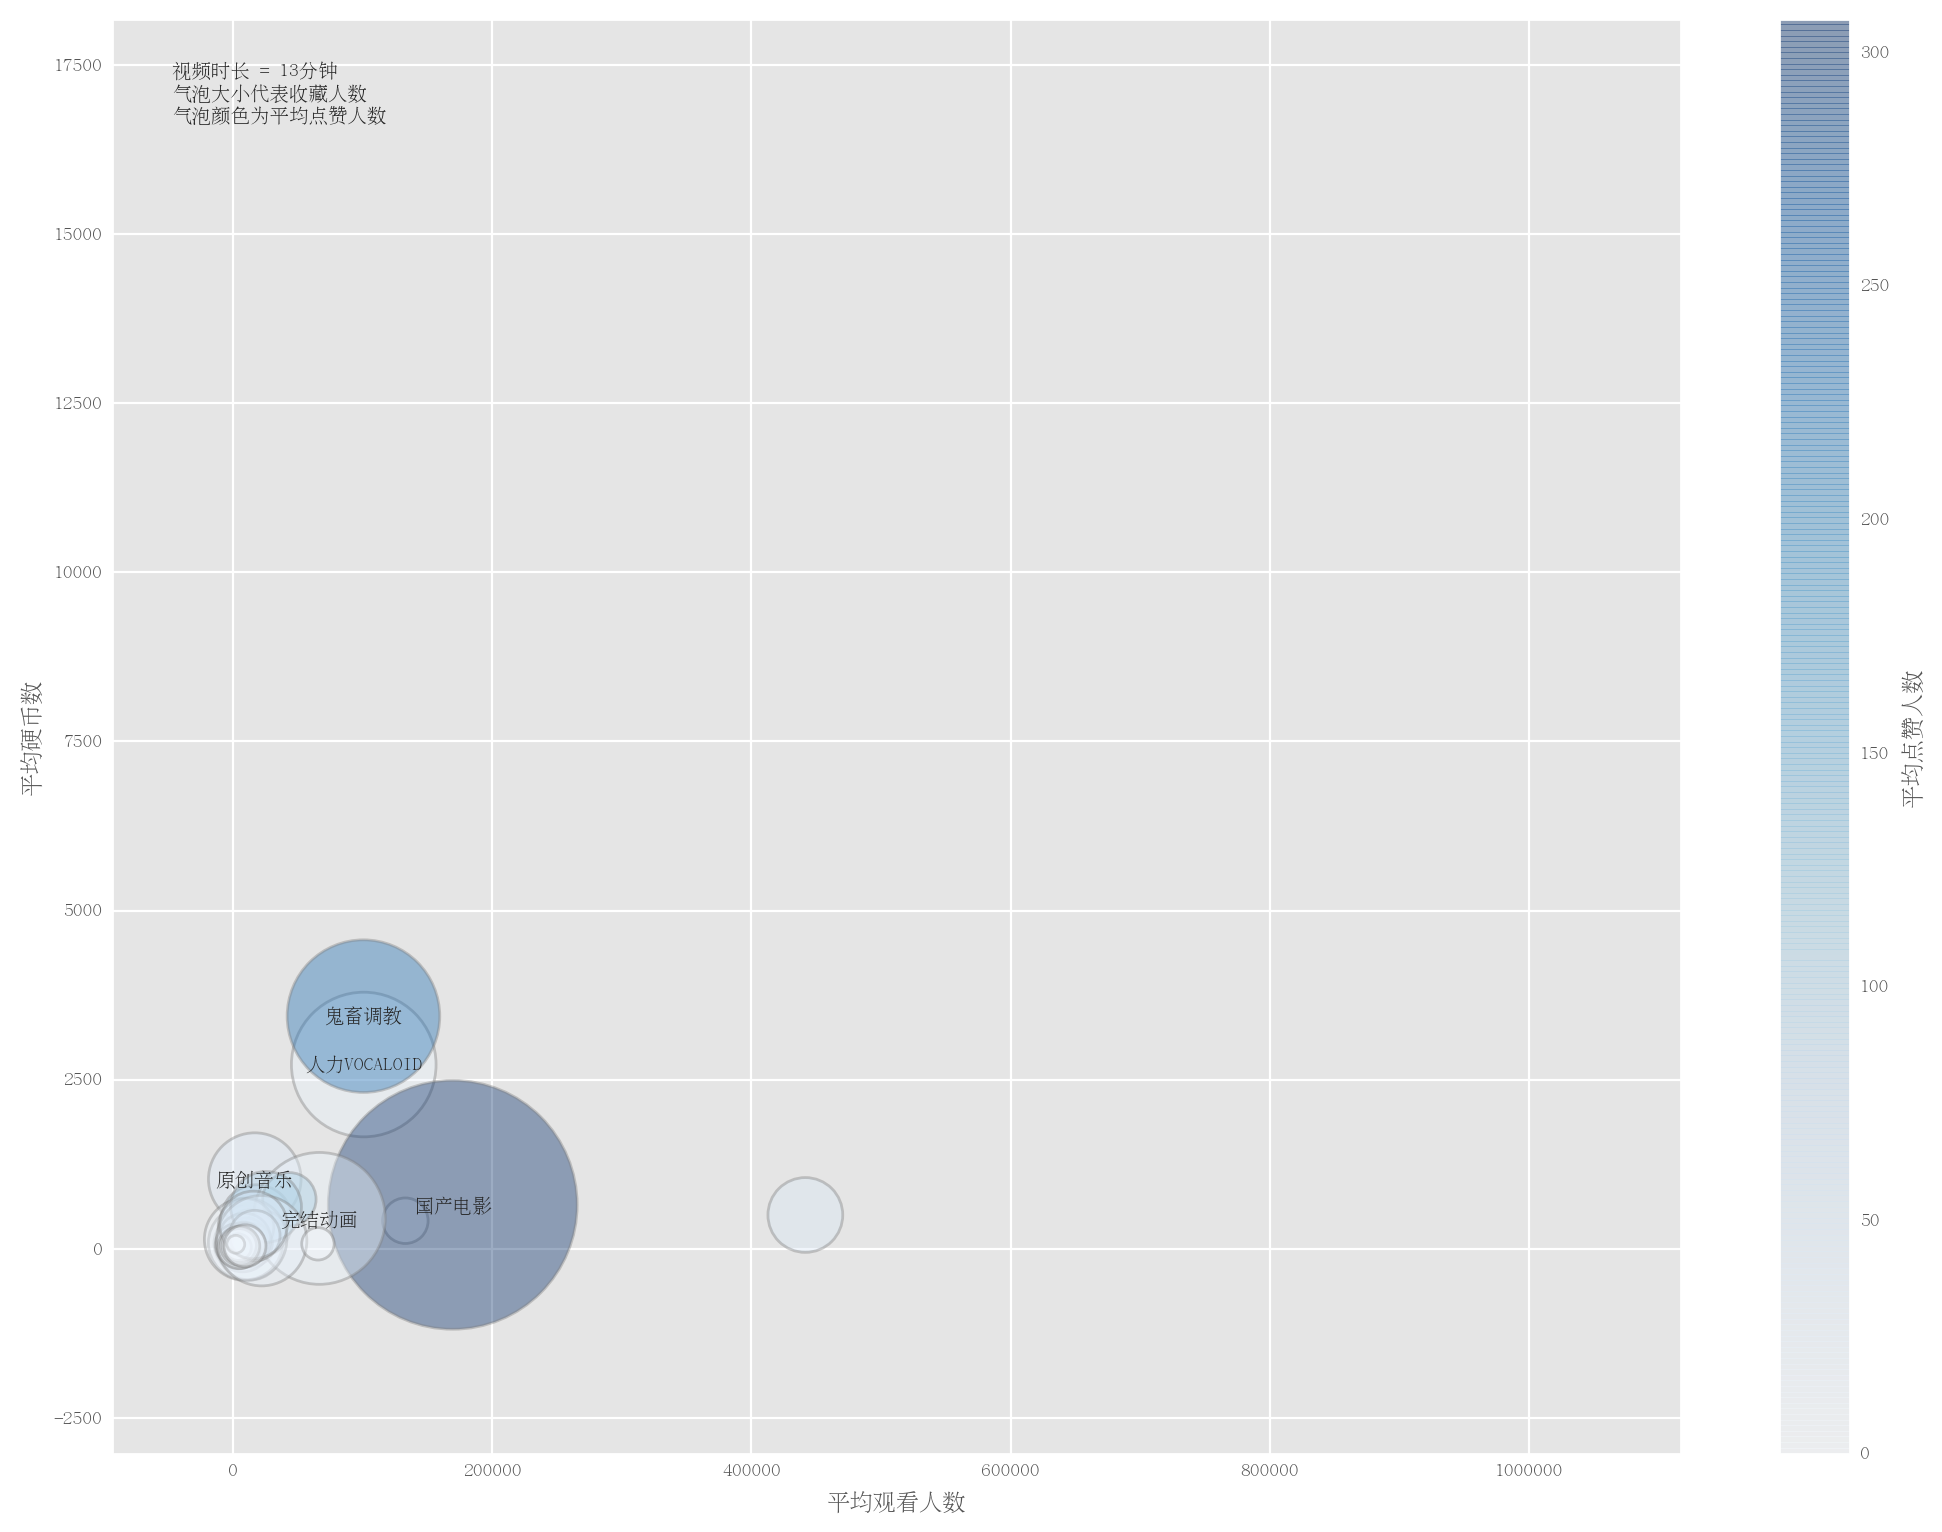

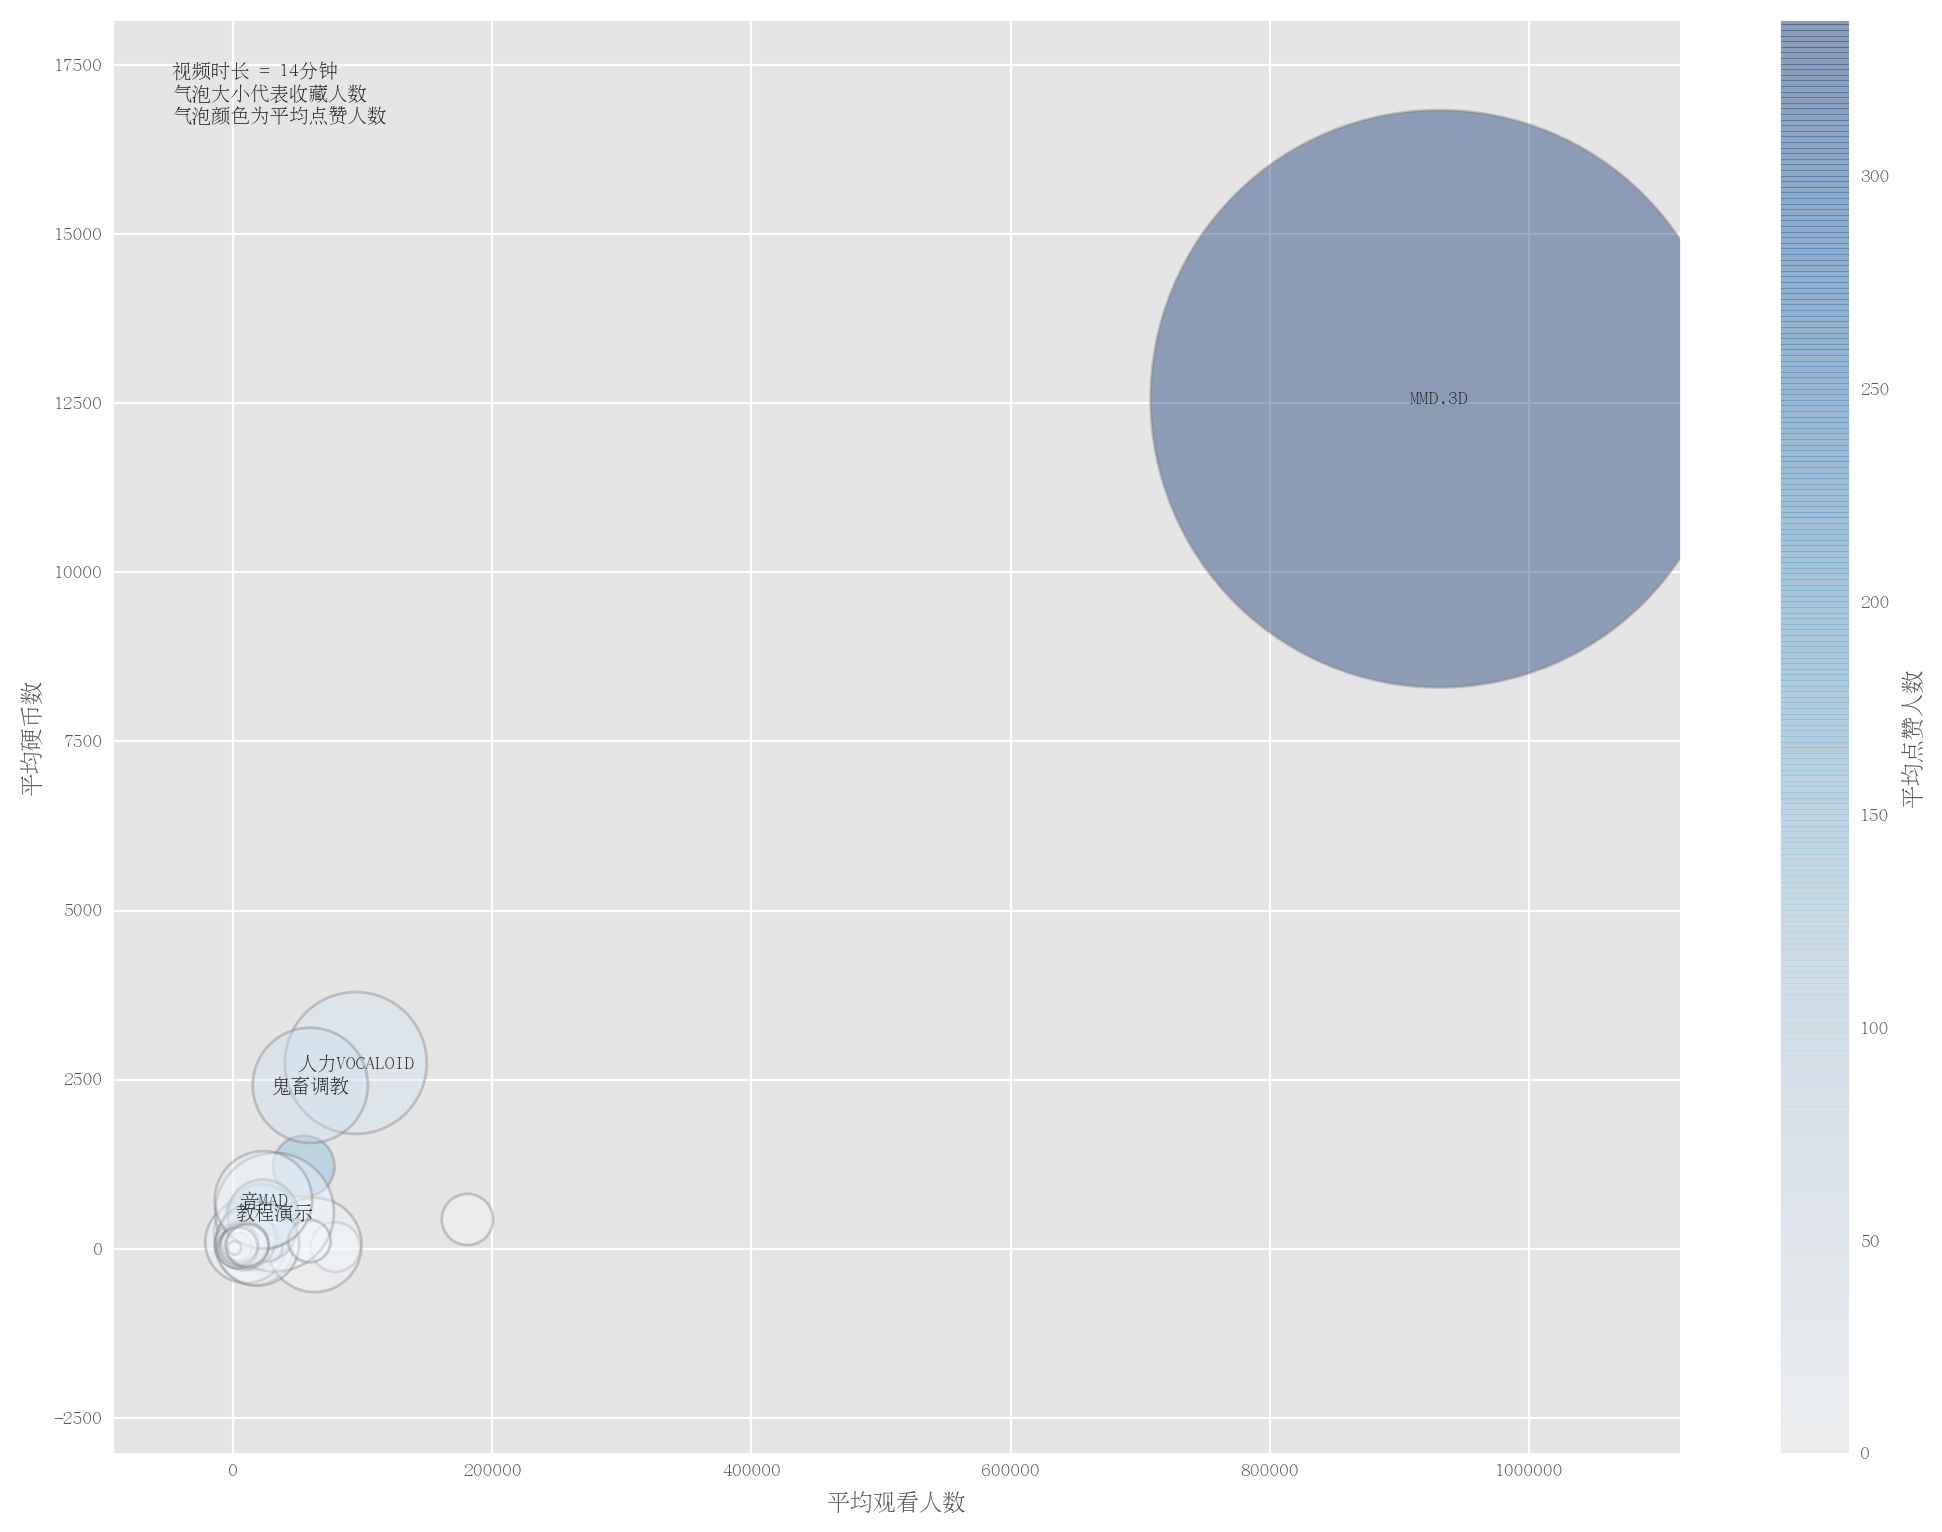

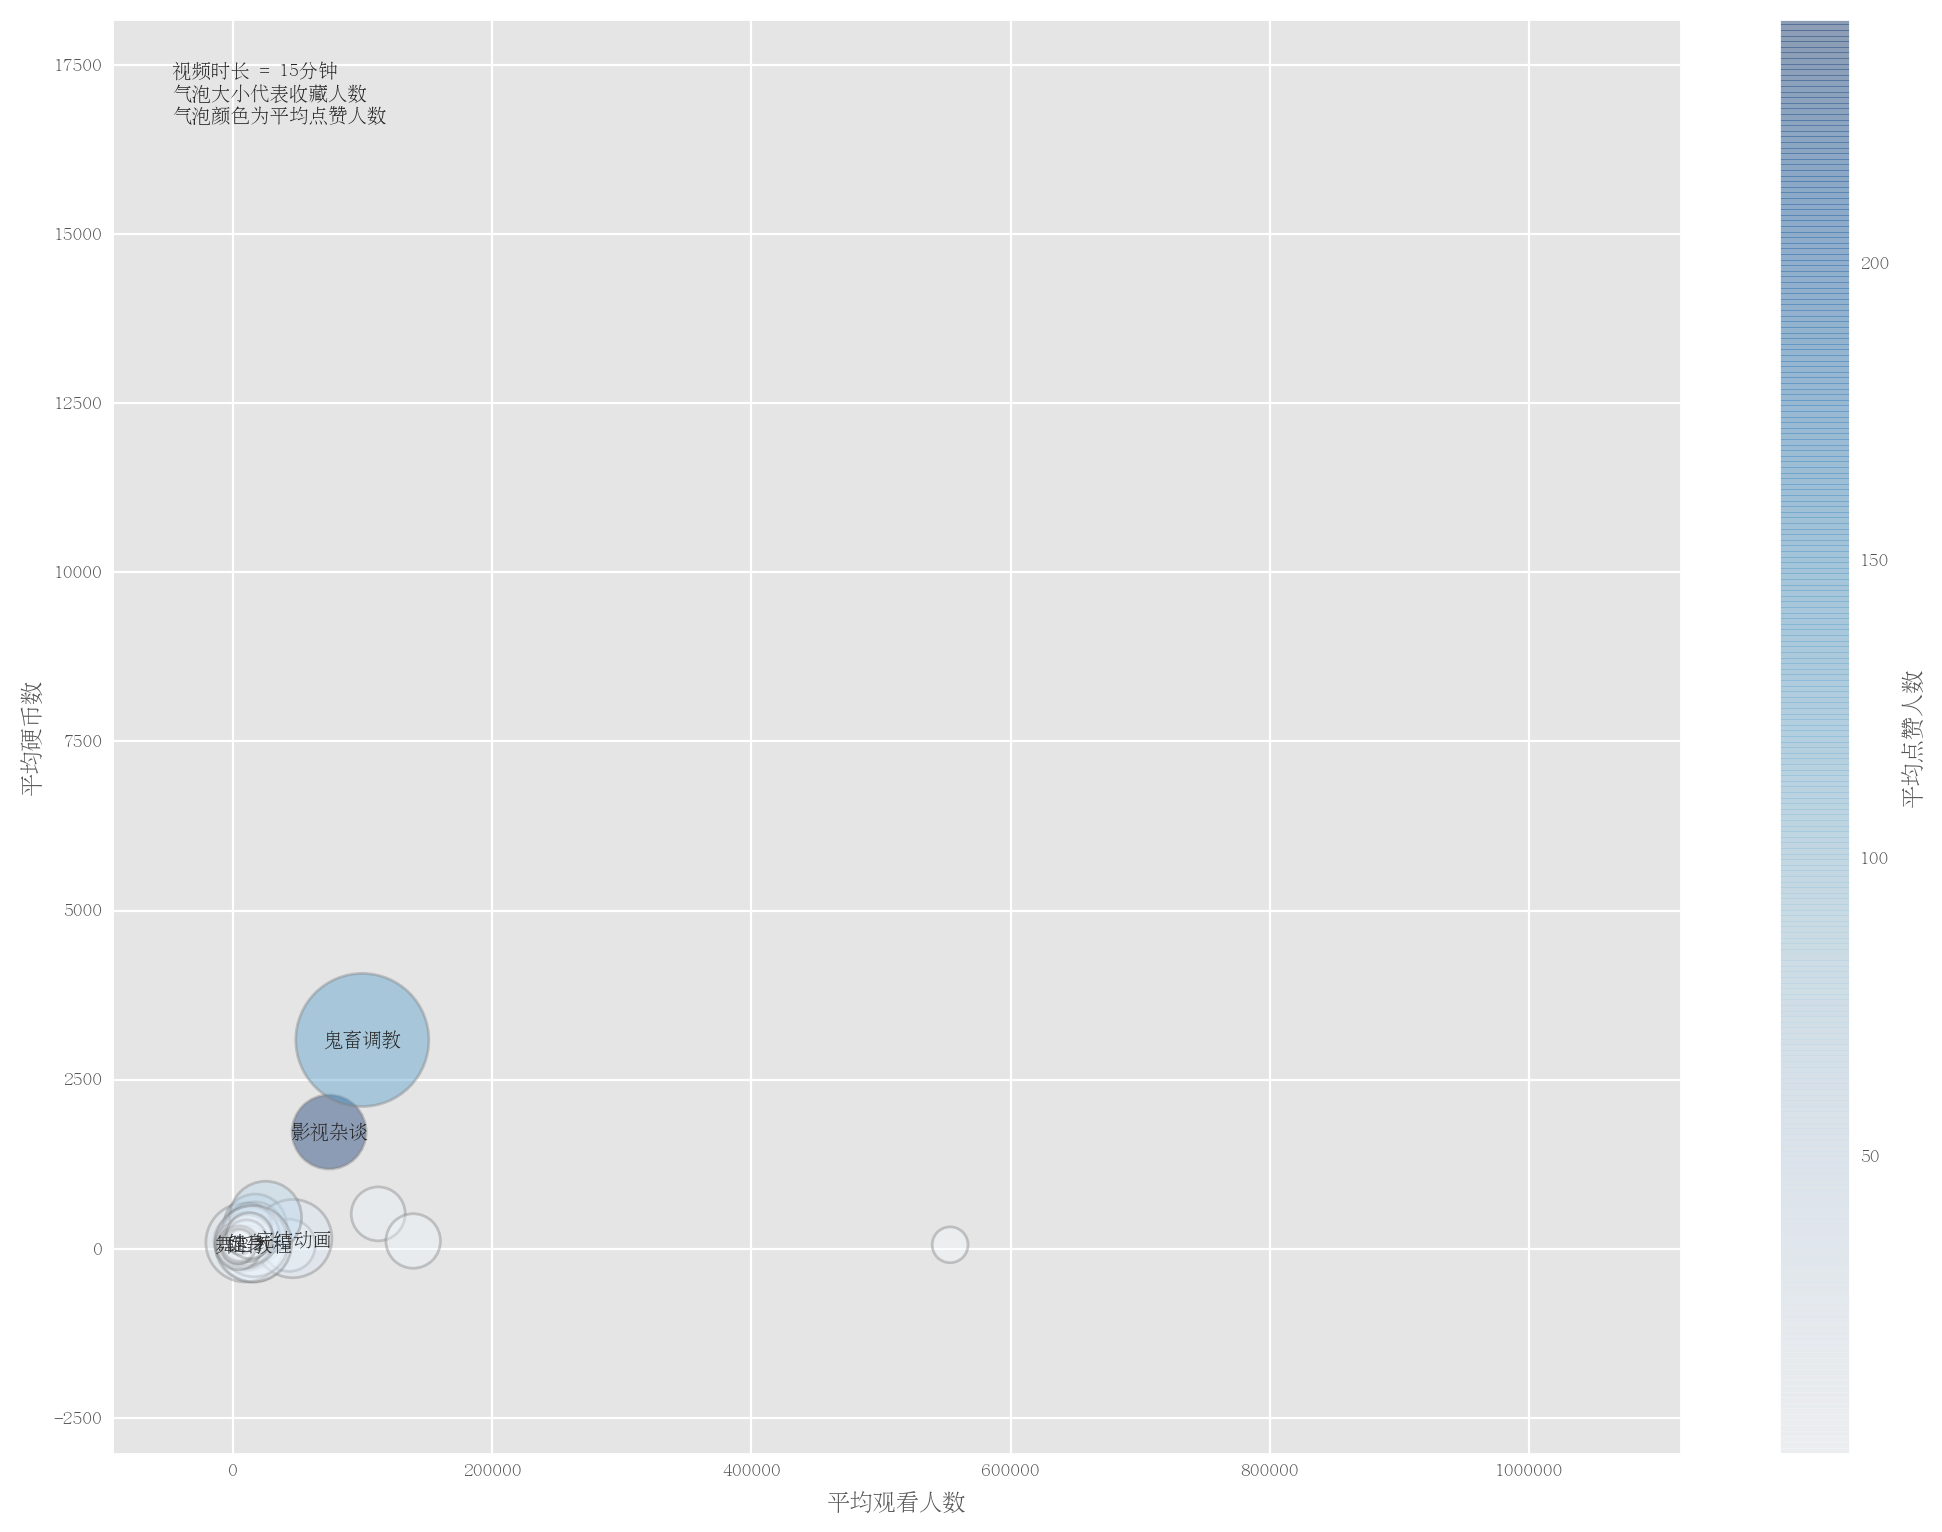

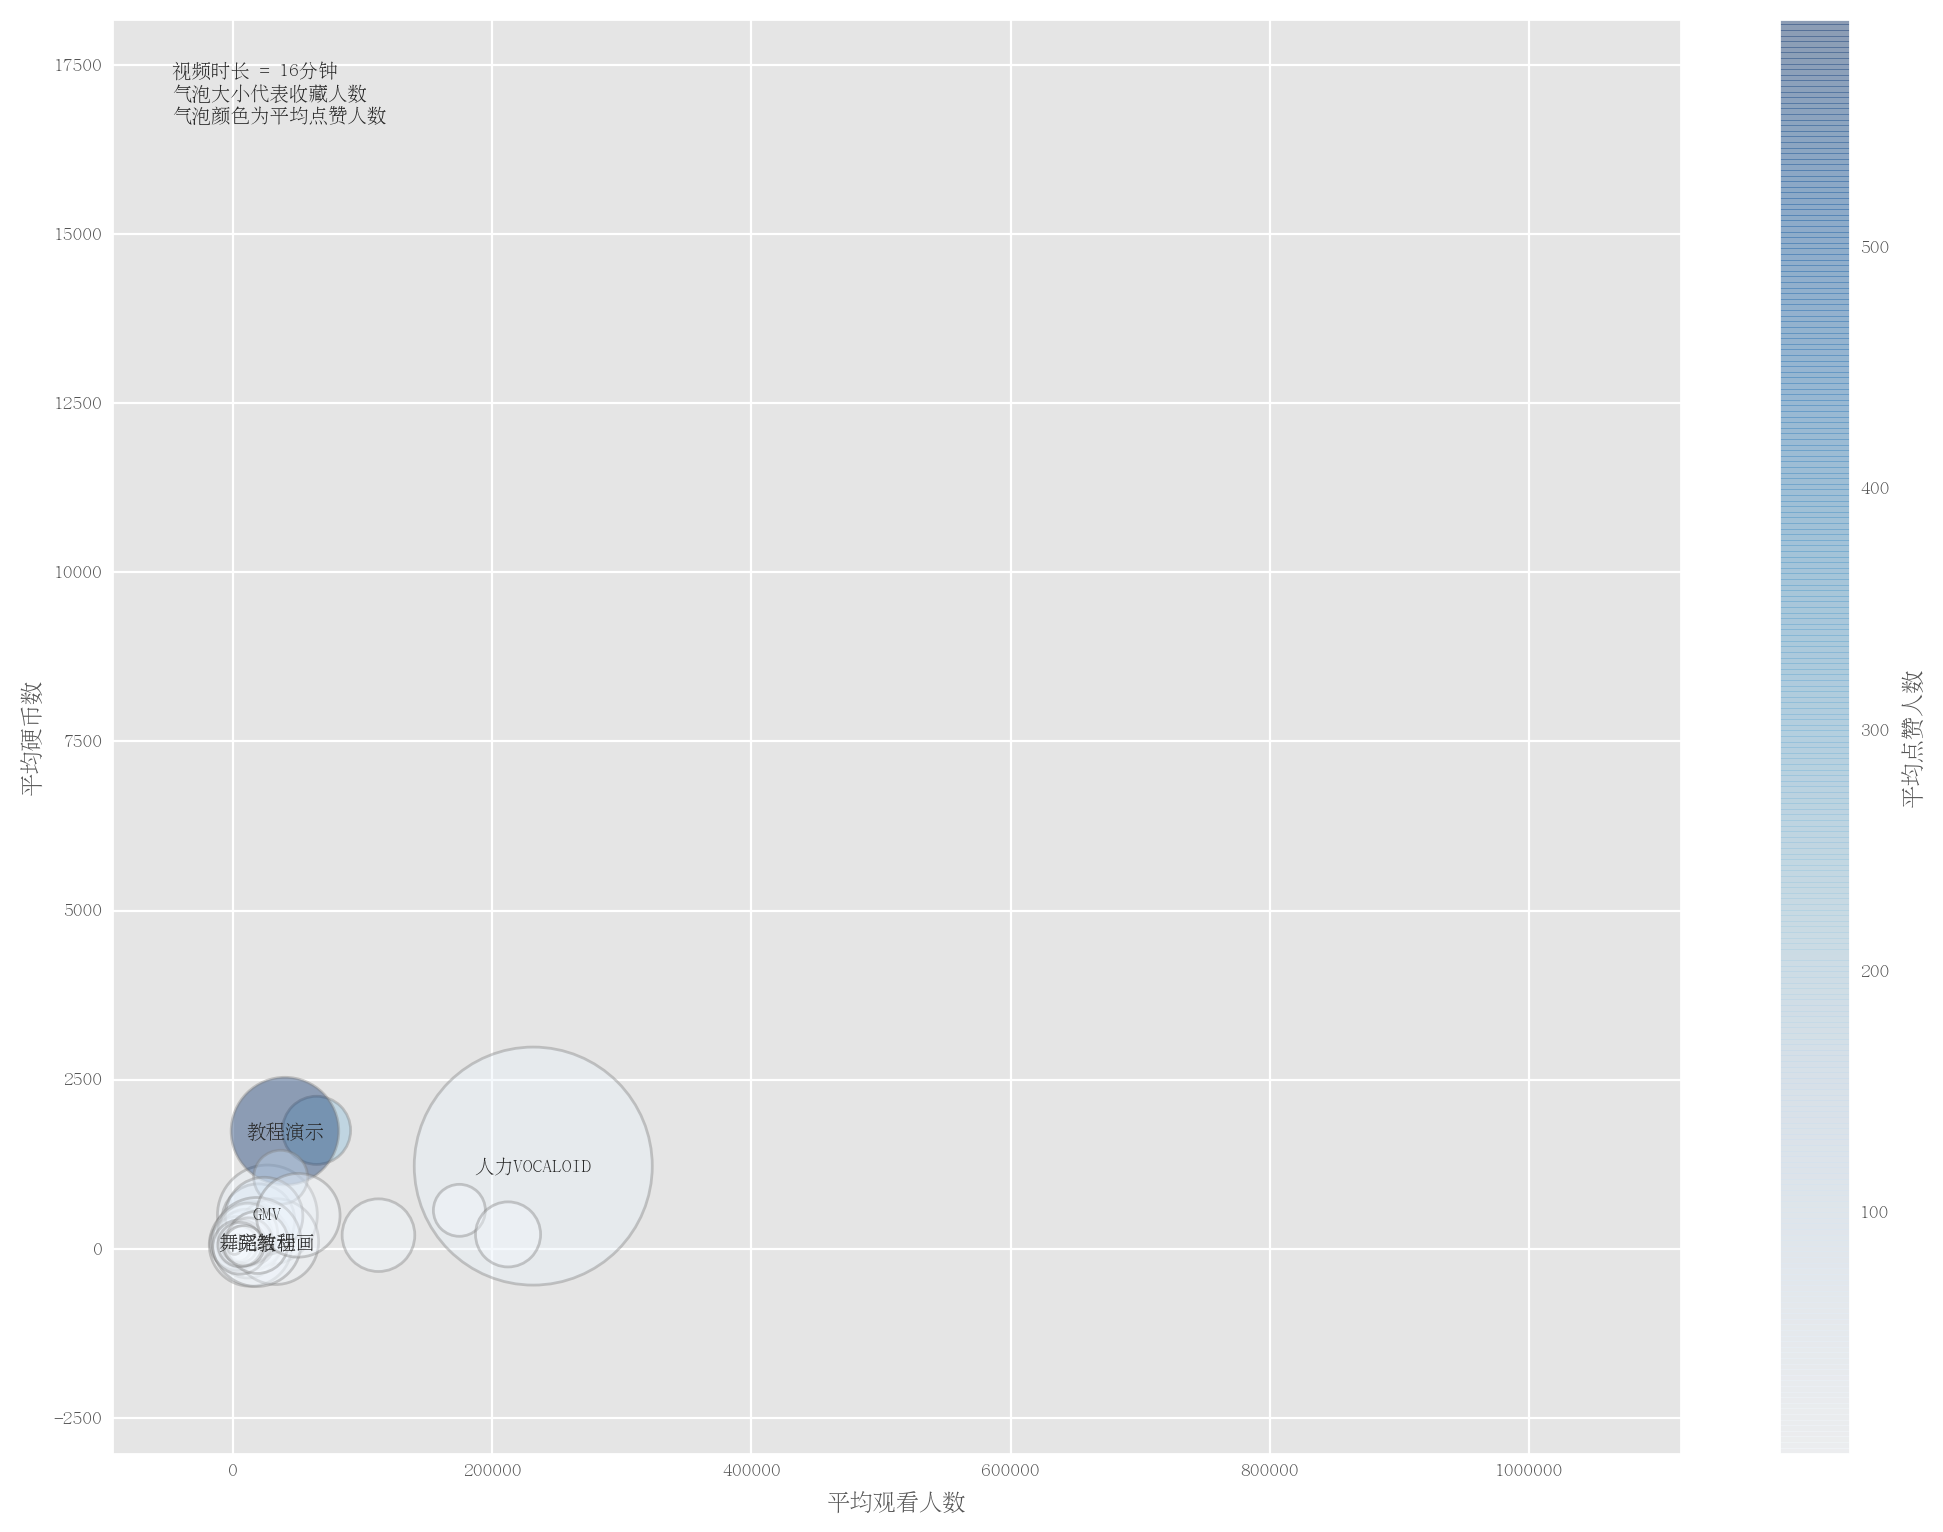

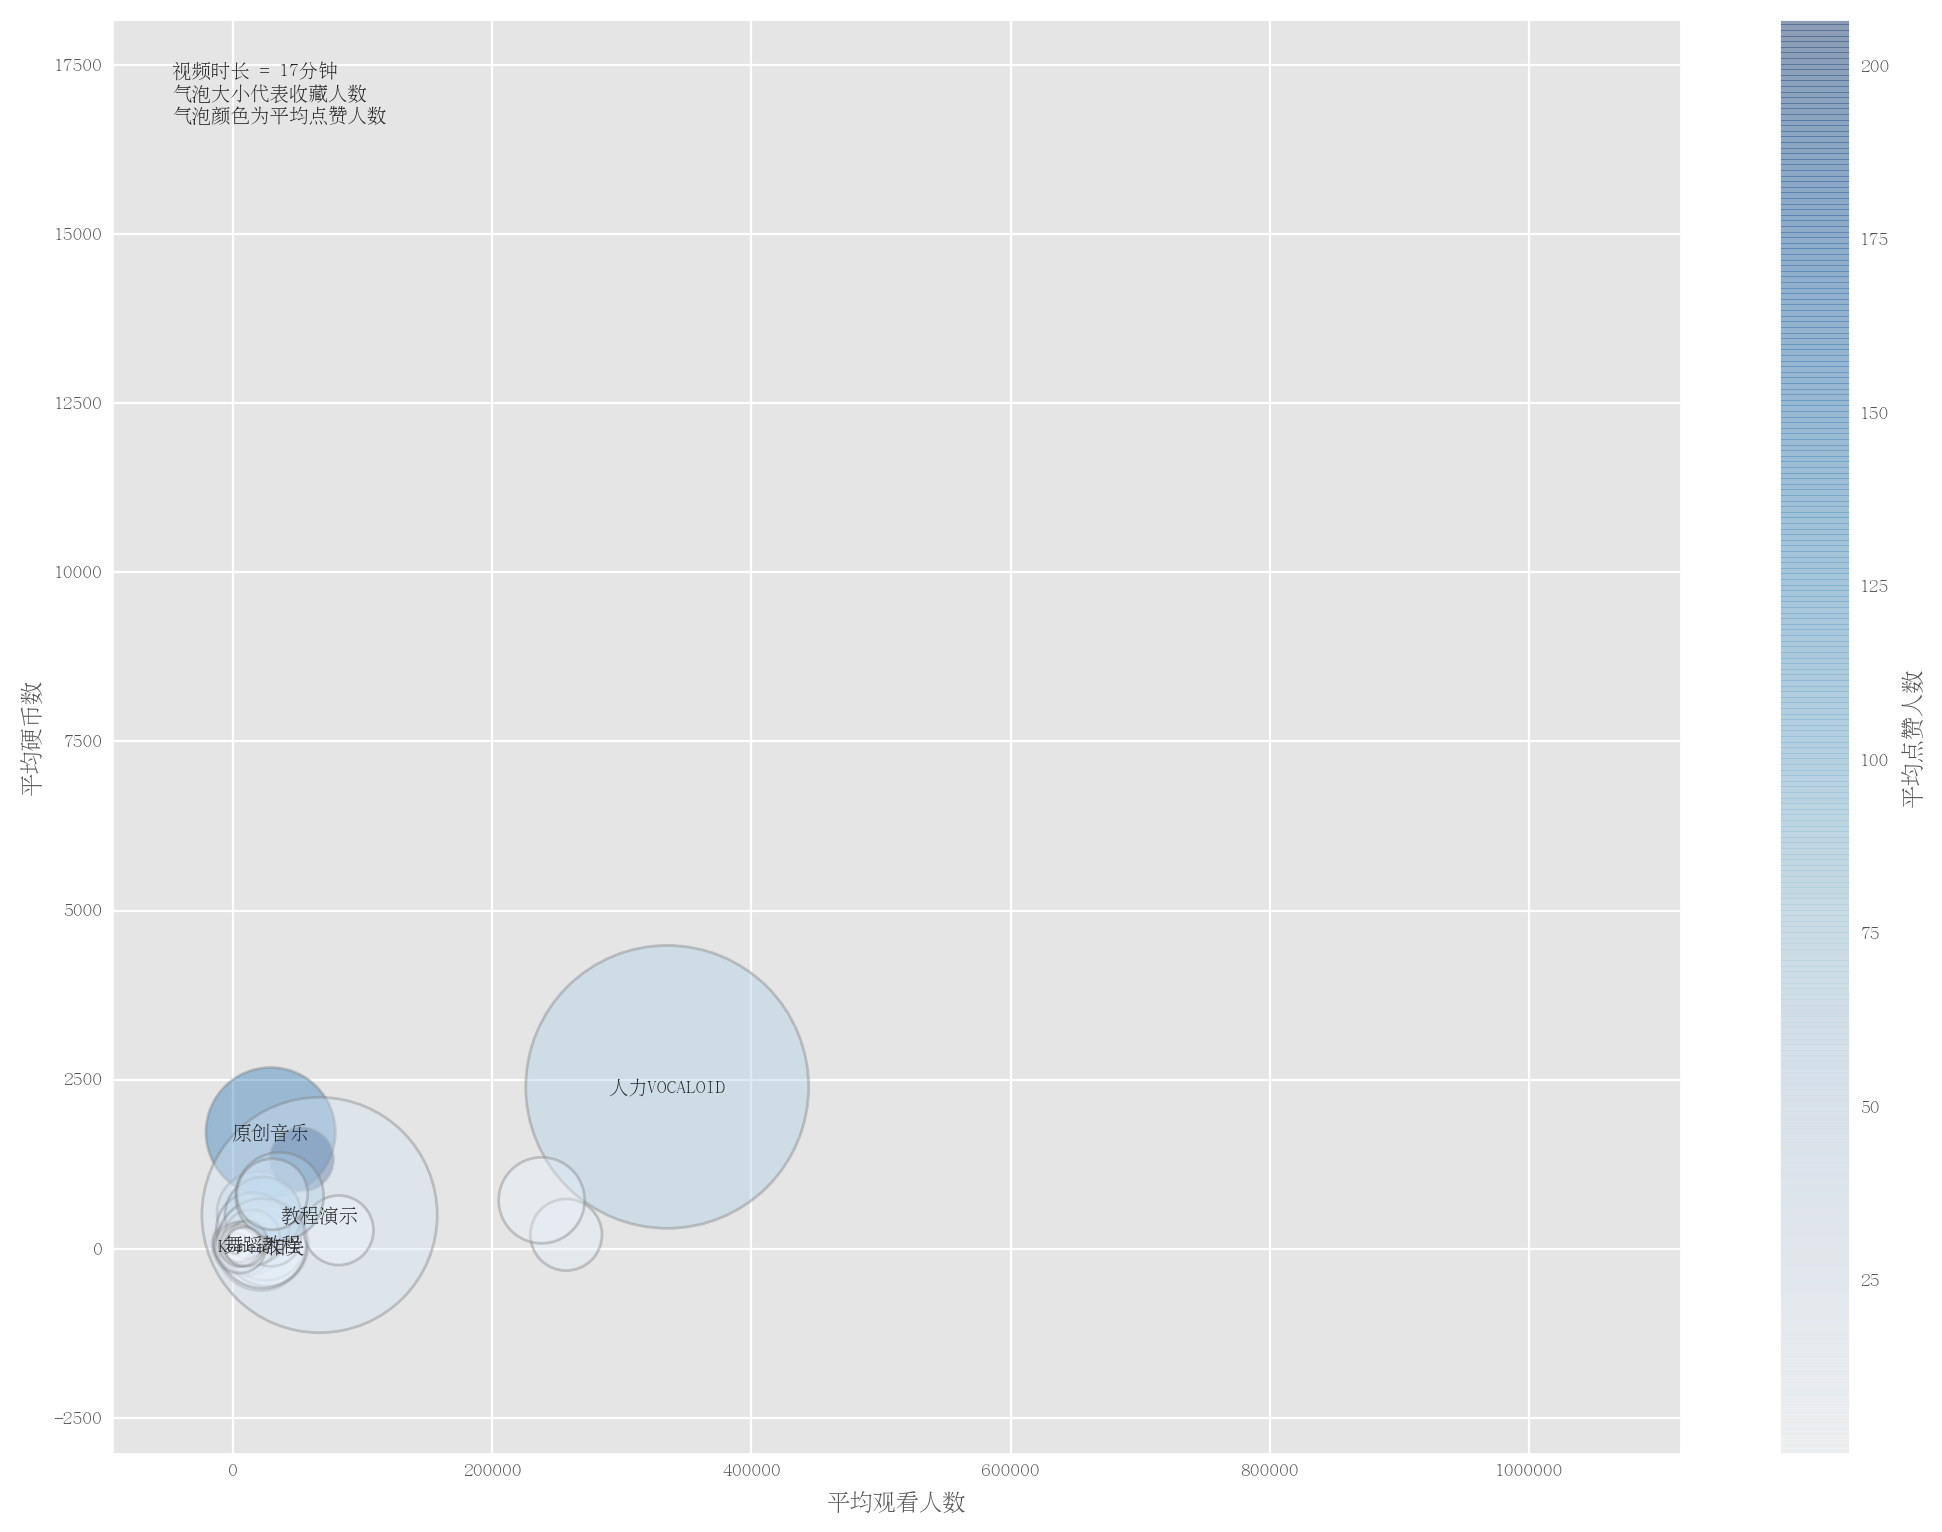

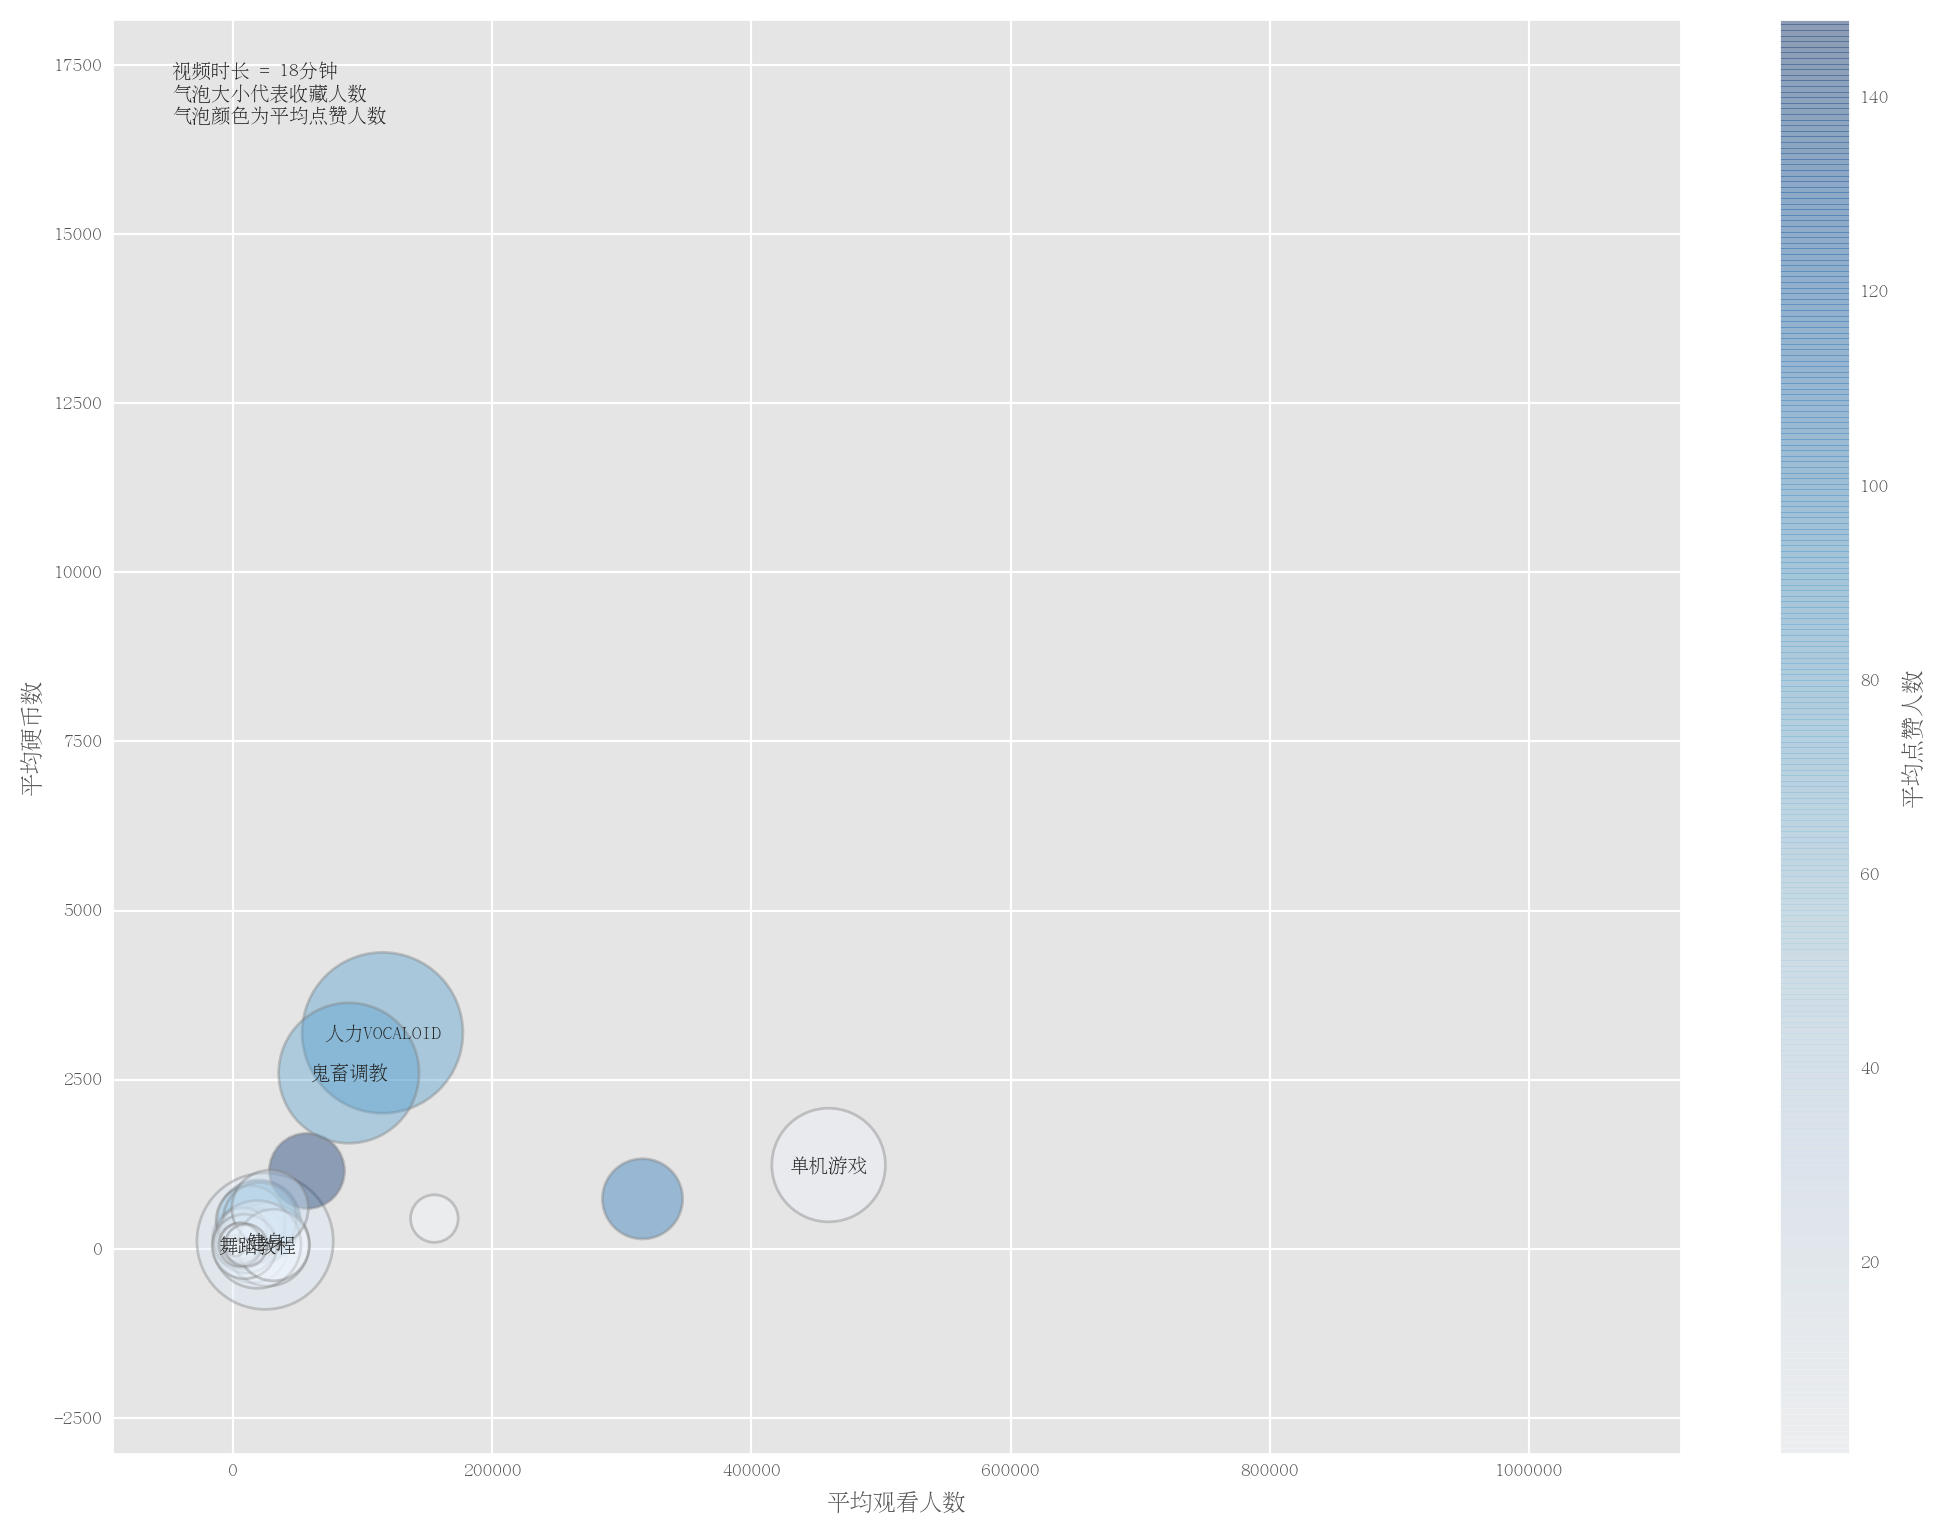

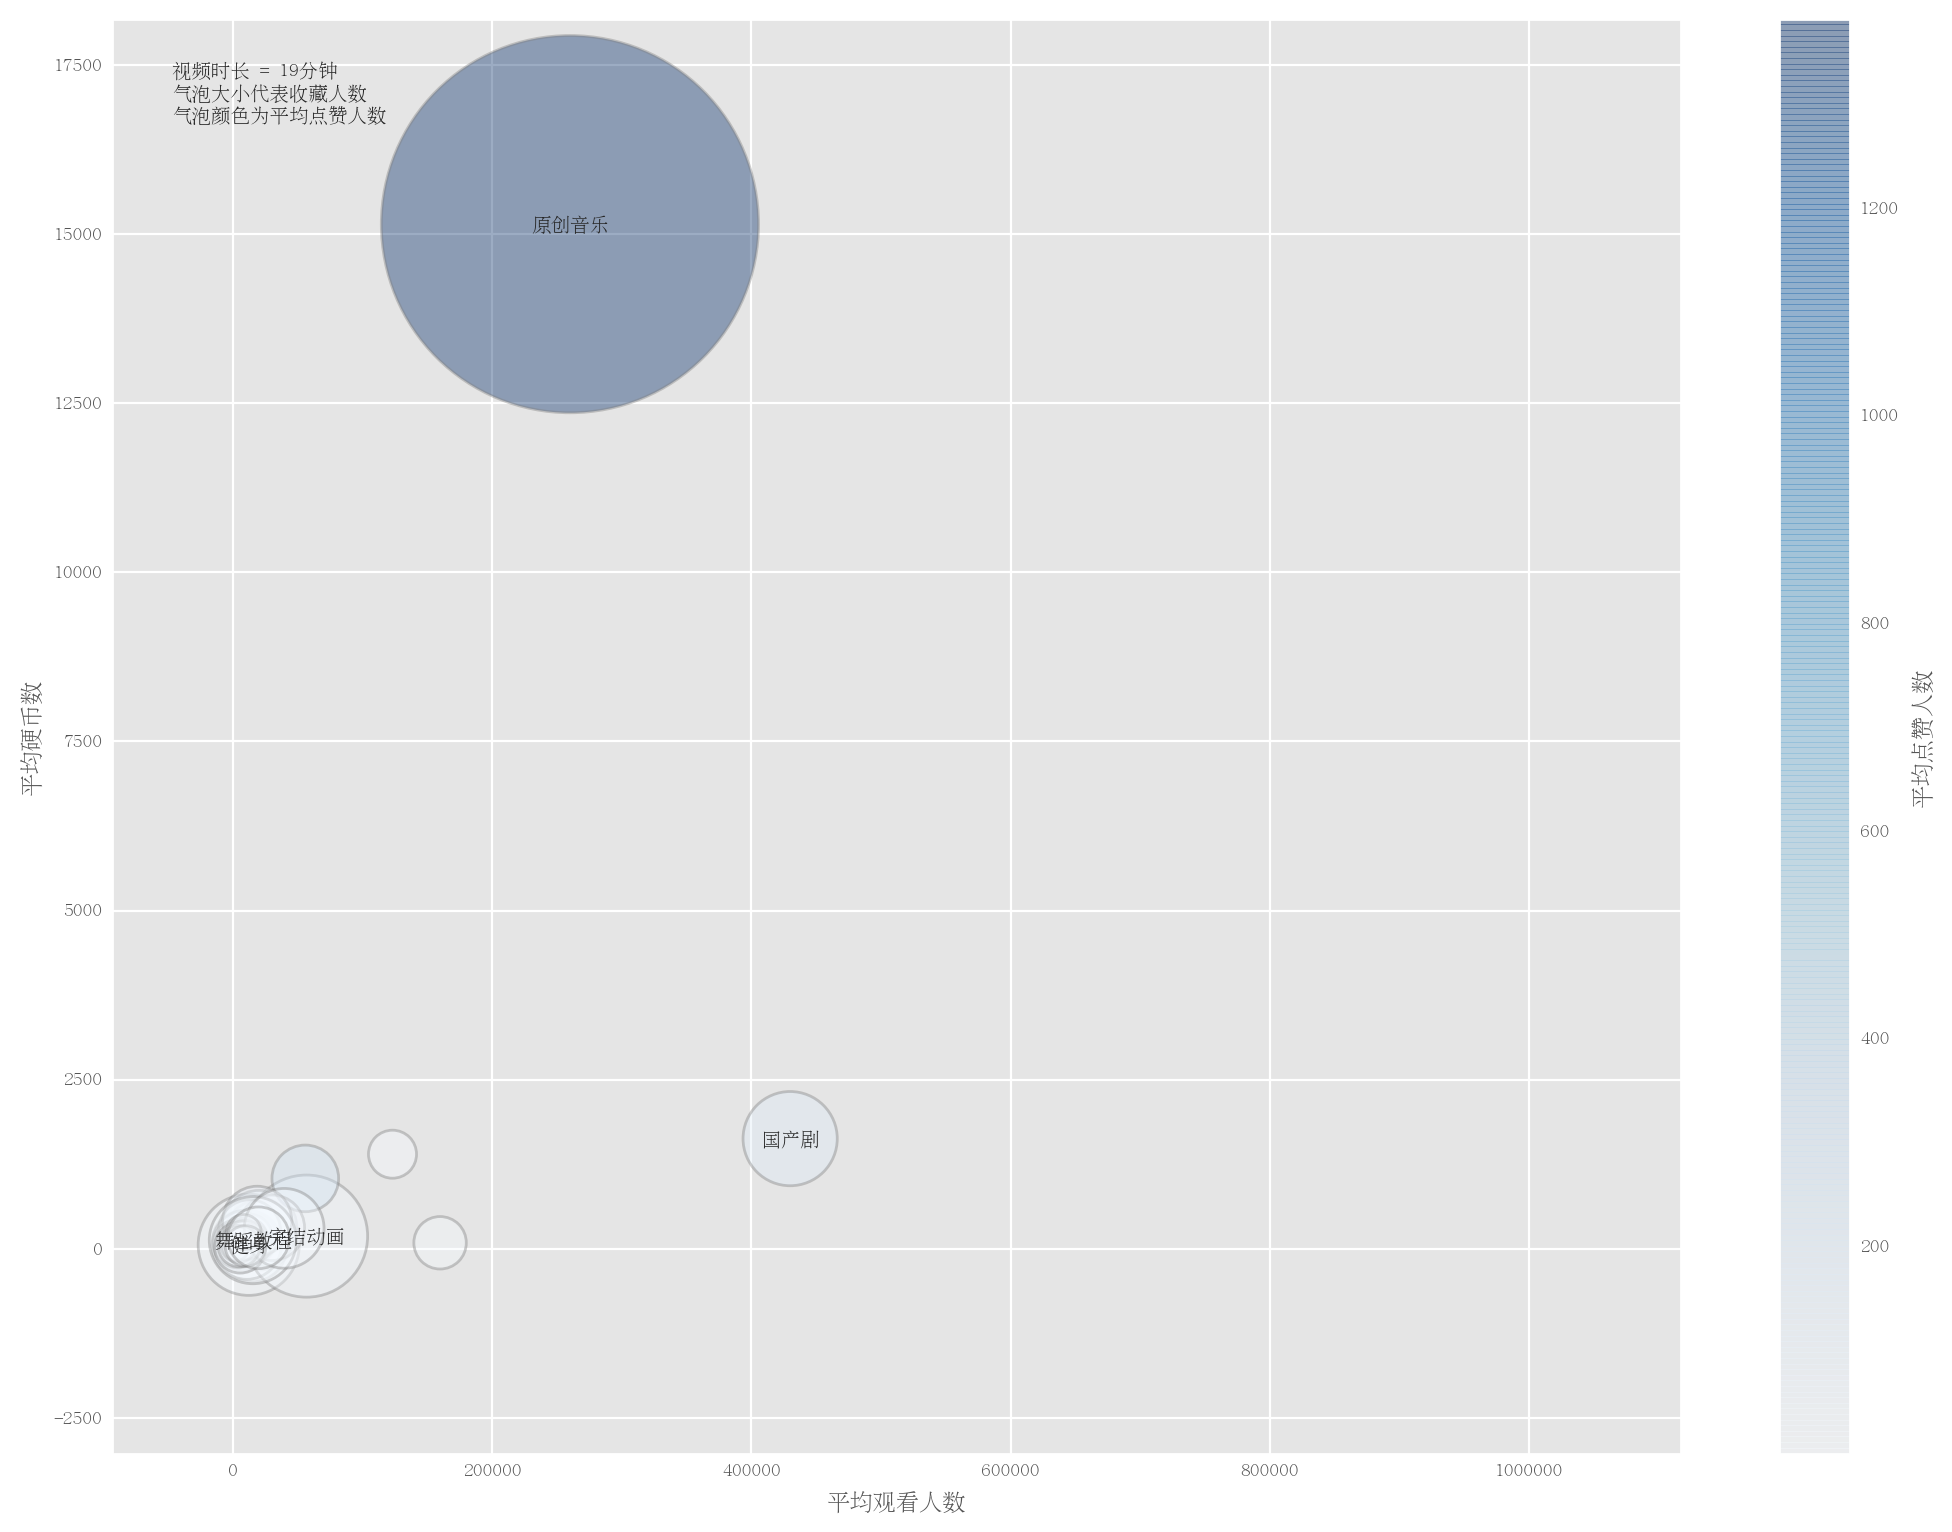

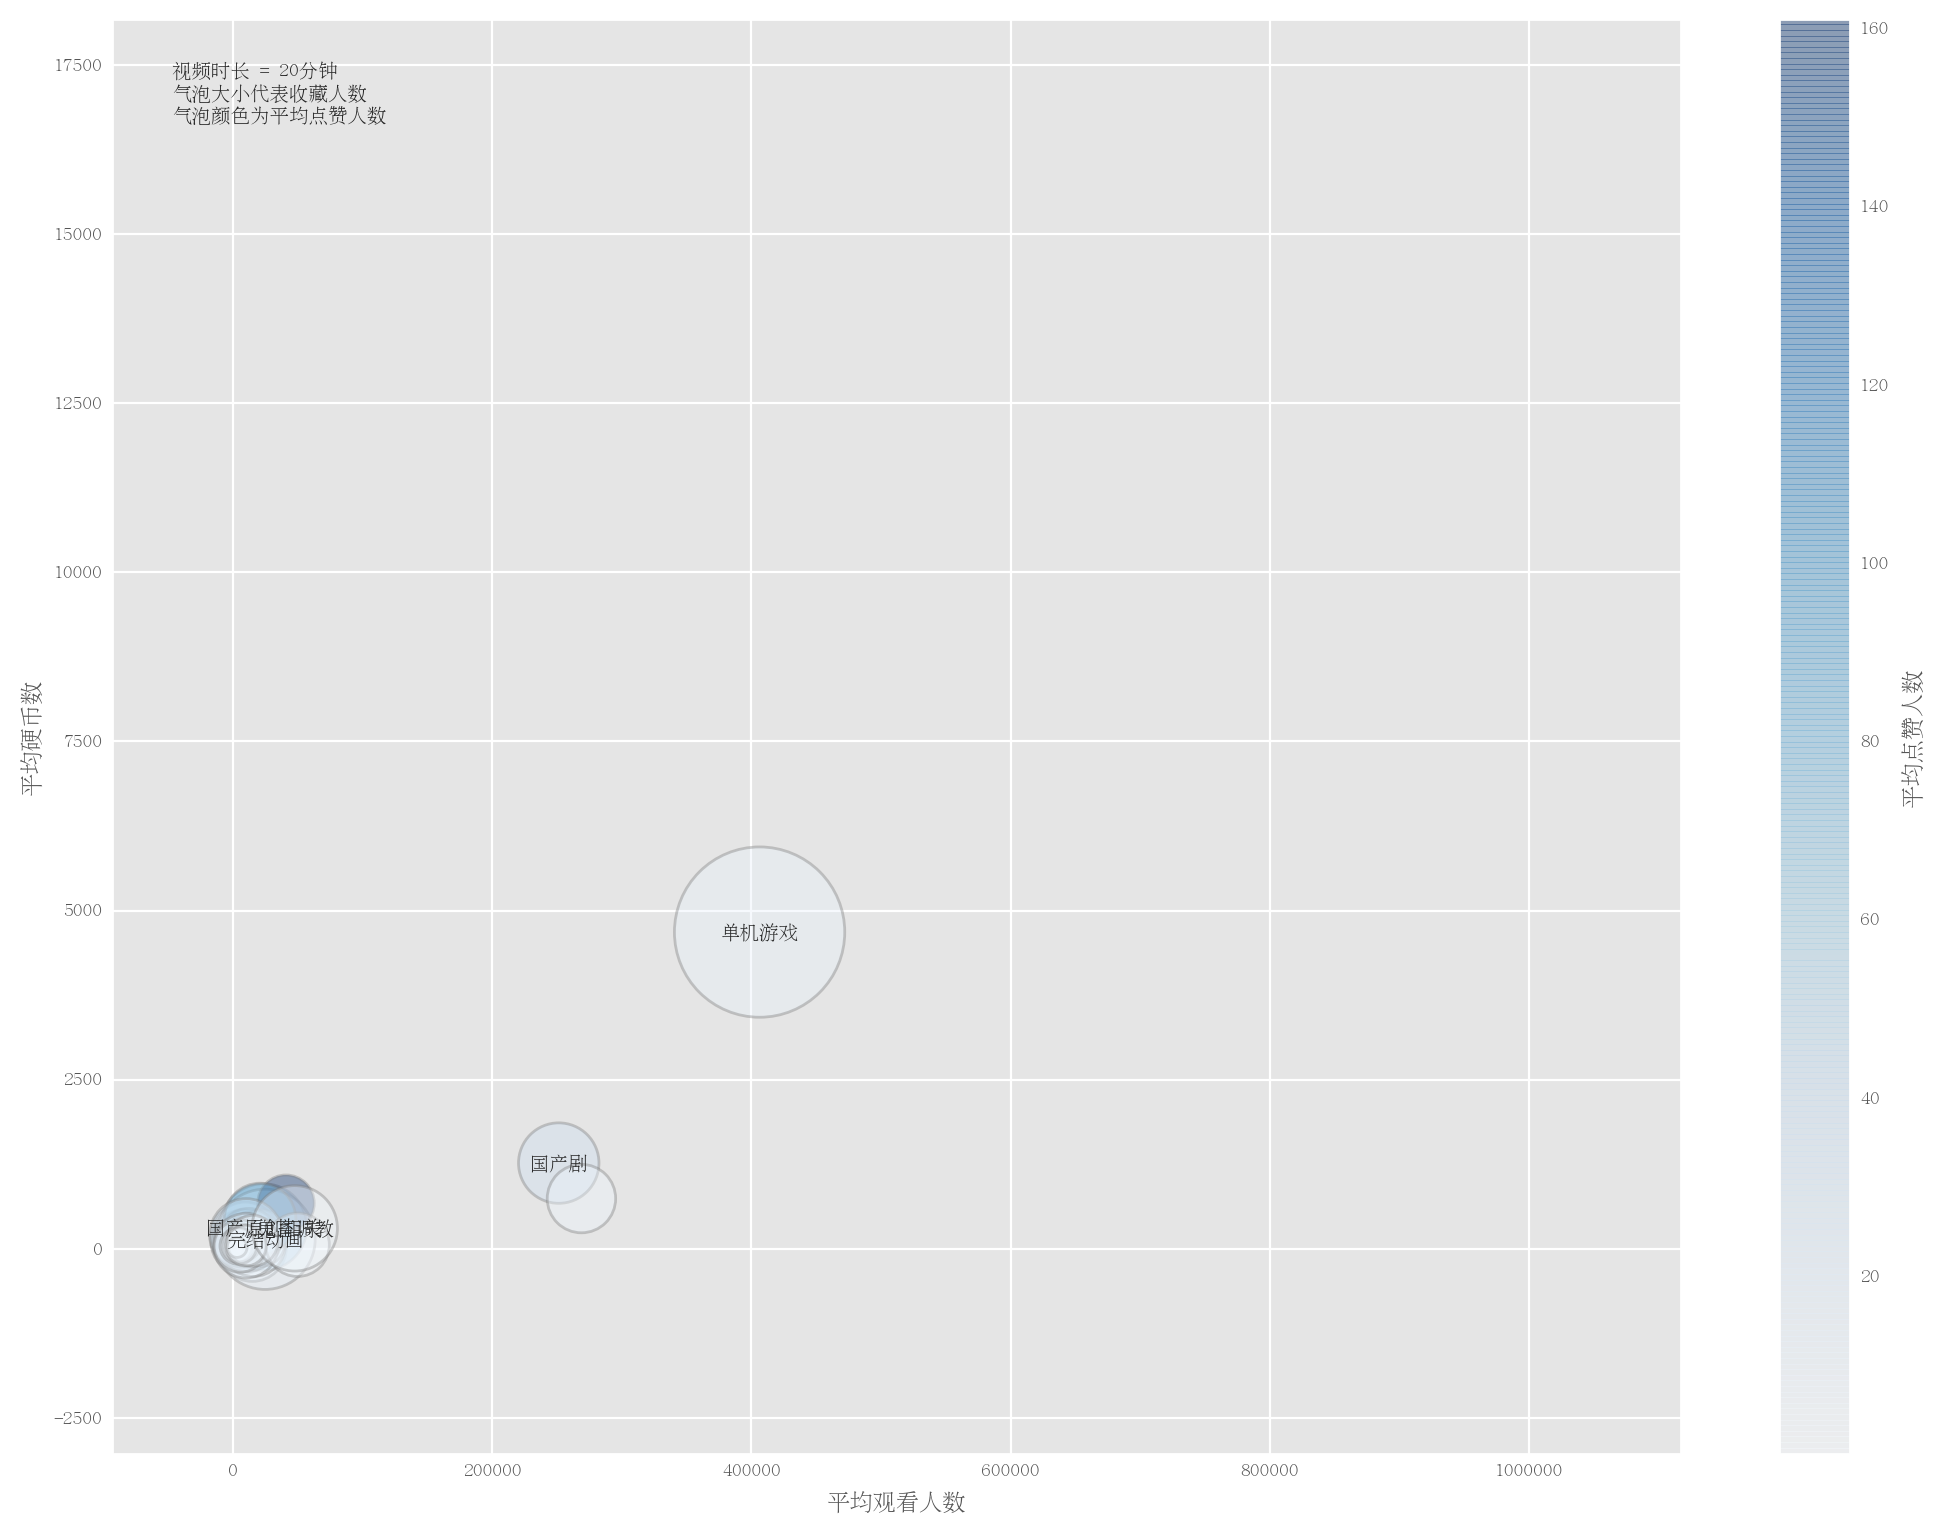

In [62]:
max_views = df_du.max()['view']
max_coins = df_du.max()['coin']
max_favorite = df_du.max()['favorite']



for dur in np.arange(1,21):
#     dur=5
    df_du_each = df_du[df_du['duration']==dur]


    fig_each, ax_each = plt.subplots(1,1, figsize=(fig_w/my_dpi, fig_h/my_dpi), dpi=my_dpi)

    plt_each = ax_each.scatter(df_du_each['view'].values, df_du_each['coin'].values, s=df_du_each['favorite'].values, c=df_du_each['like'].values, cmap="Blues", alpha=0.4, edgecolors="grey", linewidth=1)

    for i, txt in enumerate( df_du_each['sectname'].values ):
        if df_du_each['favorite'].values[i] > df_du_each.nlargest(6, 'favorite')['favorite'].values[-1]:
            ax_each.annotate(txt, ( (df_du_each['view'].values)[i], (df_du_each['coin'].values)[i] ), ha='center', va='center')


    #Annotation for the duration

    plt.annotate(
        '视频时长 = ' + str(dur)  + '分钟' +'\n' + '气泡大小代表收藏人数' + '\n' +
        '气泡颜色为平均点赞人数',
        xy=(-0.05*max_views, 1.1*max_coins))


    ax_each.set(xlim =[-0.1*max_views,max_views*1.2], ylim =[-0.2*max_coins,max_coins*1.2])
    ax_each.set(xlabel= '平均观看人数', ylabel='平均硬币数')
    plt.colorbar(plt_each, label='平均点赞人数')
    # plt.show()

    filename='export/bubble/duration_step'+str(dur).zfill(2)+'.png'
    plt.savefig(filename, dpi=96)
    plt.gca()

Convert to video or gif using imagemagick

```
convert -delay 80 Gapminder*.png animated_gapminder.gif
```


In [63]:
%%bash
convert -delay 80 export/bubble/duration_step*.png export/bubble/animated_bubble.gif

### References

1. https://python-graph-gallery.com/272-map-a-color-to-bubble-plot/